In [ ]:
pip install pandas

In [6]:
pip install seaborn


     ---------------------------------------- 0.0/165.5 kB ? eta -:--:--
     ----------------------------------- -- 153.6/165.5 kB 4.5 MB/s eta 0:00:01
     -------------------------------------- 165.5/165.5 kB 2.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   ---------------------------------------- 294.9/294.9 kB 6.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   -- ------------------------------------- 0.6/8.0 MB 12.2 MB/s eta 0:00:01
   --- ------------------------------------ 0.7/8.0 MB 9.5 MB/s eta 0:00:01
   ---- ----------------------------------- 0.9/8.0 MB 7.1 MB/s eta 0:00:01
   ---- ----------------------------------- 0.9/8.0 MB 7.1 MB/s eta 0:00:01
   ---- ----------------------------------- 0.9/8.0 MB 7.1 MB/s eta 0:00:01
   ------- -------------------------------- 1.5/8.0 MB 5.5 MB/s eta 0:00:02
   -------- ------------------------------- 1.6/8.0 MB 5.3 MB/s eta 0:00:02
   --------- 

In [7]:
pip install tensorflow

  Using cached tensorflow-2.16.1-cp311-cp311-win_amd64.whl.metadata (3.5 kB)
  Using cached tensorflow_intel-2.16.1-cp311-cp311-win_amd64.whl.metadata (5.0 kB)
  Using cached absl_py-2.1.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-24.3.25-py2.py3-none-any.whl.metadata (850 bytes)
  Using cached gast-0.5.4-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached h5py-3.11.0-cp311-cp311-win_amd64.whl.metadata (2.5 kB)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl.metadata (5.3 kB)
  Using cached ml_dtypes-0.3.2-cp311-cp311-win_amd64.whl.metadata (20 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl.metadata (6.5 kB)
  Using cached protobuf-4.25.3-cp310-abi3-win_amd64.whl.metadata (541 bytes)
  Using cached requests-2.32.3-py3-none-any.whl.metadata (4.6 kB)
  Using cached termcolor-2.4.0-py3-none-any.whl.metadata (6.1 kB

In [8]:
pip install plotly


  Using cached plotly-5.22.0-py3-none-any.whl.metadata (7.1 kB)
  Using cached tenacity-8.3.0-py3-none-any.whl.metadata (1.2 kB)
Using cached plotly-5.22.0-py3-none-any.whl (16.4 MB)
Using cached tenacity-8.3.0-py3-none-any.whl (25 kB)


In [10]:
import numpy as np
import pandas as pd
import math

import seaborn as sns

import matplotlib.pyplot as plt
import plotly.graph_objects as go
import tensorflow as tf

energy = pd.read_csv('energy_dataset.csv')
energy.head()
energy.describe().T
energy.rename(columns={
   'total load actual':'Energy Consumption'

}, inplace=True)

energy.tail(5)

,time,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,...,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,Energy Consumption,price day ahead,price actual
35059,2018-12-31 19:00:00+01:00,297.0,0.0,0.0,7634.0,2628.0,178.0,0.0,0.0,0.0,...,277.0,0.0,3113.0,96.0,NaN,3253.0,30619.0,30653.0,68.85,77.02
35060,2018-12-31 20:00:00+01:00,296.0,0.0,0.0,7241.0,2566.0,174.0,0.0,0.0,0.0,...,280.0,0.0,3288.0,51.0,NaN,3353.0,29932.0,29735.0,68.40,76.16
35061,2018-12-31 21:00:00+01:00,292.0,0.0,0.0,7025.0,2422.0,168.0,0.0,0.0,0.0,...,286.0,0.0,3503.0,36.0,NaN,3404.0,27903.0,28071.0,66.88,74.30
35062,2018-12-31 22:00:00+01:00,293.0,0.0,0.0,6562.0,2293.0,163.0,0.0,0.0,0.0,...,287.0,0.0,3586.0,29.0,NaN,3273.0,25450.0,25801.0,63.93,69.89
35063,2018-12-31 23:00:00+01:00,290.0,0.0,0.0,6926.0,2166.0,163.0,0.0,0.0,0.0,...,287.0,0.0,3651.0,26.0,NaN,3117.0,24424.0,24455.0,64.27,69.88


  Using cached pandas-2.2.2-cp311-cp311-win_amd64.whl.metadata (19 kB)
  Using cached pytz-2024.1-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2024.1-py2.py3-none-any.whl.metadata (1.4 kB)
Using cached pandas-2.2.2-cp311-cp311-win_amd64.whl (11.6 MB)
Using cached pytz-2024.1-py2.py3-none-any.whl (505 kB)
Using cached tzdata-2024.1-py2.py3-none-any.whl (345 kB)
Note: you may need to restart the kernel to use updated packages.


In [11]:

colnames = ['generation fossil coal-derived gas', 'generation fossil oil shale','generation fossil peat',
           'generation geothermal', 'generation hydro pumped storage aggregated', 'generation marine',
           'generation wind offshore', 'forecast wind offshore eday ahead', 'forecast solar day ahead',
            'forecast wind onshore day ahead','price actual','total load forecast','price day ahead']
energy = energy.drop(colnames, axis = 1)

# def check_Nans_Dups(df_input):

#     print('Number of Nans in each column :')

#     print(df_input.isnull().sum())
#     print()/
1#     print(f'Number of duplicates in the dataframe : {df_input.duplicated().sum()}')
#     return
# check_Nans_Dups(df_energy)




1

In [12]:
energy.isnull().sum()



time                                            0
generation biomass                             19
generation fossil brown coal/lignite           18
generation fossil gas                          18
generation fossil hard coal                    18
generation fossil oil                          19
generation hydro pumped storage consumption    19
generation hydro run-of-river and poundage     19
generation hydro water reservoir               18
generation nuclear                             17
generation other                               18
generation other renewable                     18
generation solar                               18
generation waste                               19
generation wind onshore                        18
Energy Consumption                             36
dtype: int64

In [13]:
energy['time'] = pd.to_datetime(energy['time'])
energy = energy.set_index('time')
energy

energy.tail(5)

C:\Users\HP\AppData\Local\Temp\ipykernel_19908\2968470703.py:1: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  energy['time'] = pd.to_datetime(energy['time'])


,generation biomass,generation fossil brown coal/lignite,generation fossil gas,generation fossil hard coal,generation fossil oil,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation nuclear,generation other,generation other renewable,generation solar,generation waste,generation wind onshore,Energy Consumption
time,,,,,,,,,,,,,,,
2018-12-31 19:00:00+01:00,297.0,0.0,7634.0,2628.0,178.0,1.0,1135.0,4836.0,6073.0,63.0,95.0,85.0,277.0,3113.0,30653.0
2018-12-31 20:00:00+01:00,296.0,0.0,7241.0,2566.0,174.0,1.0,1172.0,3931.0,6074.0,62.0,95.0,33.0,280.0,3288.0,29735.0
2018-12-31 21:00:00+01:00,292.0,0.0,7025.0,2422.0,168.0,50.0,1148.0,2831.0,6076.0,61.0,94.0,31.0,286.0,3503.0,28071.0
2018-12-31 22:00:00+01:00,293.0,0.0,6562.0,2293.0,163.0,108.0,1128.0,2068.0,6075.0,61.0,93.0,31.0,287.0,3586.0,25801.0
2018-12-31 23:00:00+01:00,290.0,0.0,6926.0,2166.0,163.0,108.0,1069.0,1686.0,6075.0,61.0,92.0,31.0,287.0,3651.0,24455.0


In [15]:
energy[energy.isna().any(axis = 1)]

energy.tail(5)

,generation biomass,generation fossil brown coal/lignite,generation fossil gas,generation fossil hard coal,generation fossil oil,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation nuclear,generation other,generation other renewable,generation solar,generation waste,generation wind onshore,Energy Consumption
time,,,,,,,,,,,,,,,
2018-12-31 19:00:00+01:00,297.0,0.0,7634.0,2628.0,178.0,1.0,1135.0,4836.0,6073.0,63.0,95.0,85.0,277.0,3113.0,30653.0
2018-12-31 20:00:00+01:00,296.0,0.0,7241.0,2566.0,174.0,1.0,1172.0,3931.0,6074.0,62.0,95.0,33.0,280.0,3288.0,29735.0
2018-12-31 21:00:00+01:00,292.0,0.0,7025.0,2422.0,168.0,50.0,1148.0,2831.0,6076.0,61.0,94.0,31.0,286.0,3503.0,28071.0
2018-12-31 22:00:00+01:00,293.0,0.0,6562.0,2293.0,163.0,108.0,1128.0,2068.0,6075.0,61.0,93.0,31.0,287.0,3586.0,25801.0
2018-12-31 23:00:00+01:00,290.0,0.0,6926.0,2166.0,163.0,108.0,1069.0,1686.0,6075.0,61.0,92.0,31.0,287.0,3651.0,24455.0


In [16]:
energy.interpolate(method='linear', limit_direction='forward', inplace = True)

energy.tail(5)

,generation biomass,generation fossil brown coal/lignite,generation fossil gas,generation fossil hard coal,generation fossil oil,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation nuclear,generation other,generation other renewable,generation solar,generation waste,generation wind onshore,Energy Consumption
time,,,,,,,,,,,,,,,
2018-12-31 19:00:00+01:00,297.0,0.0,7634.0,2628.0,178.0,1.0,1135.0,4836.0,6073.0,63.0,95.0,85.0,277.0,3113.0,30653.0
2018-12-31 20:00:00+01:00,296.0,0.0,7241.0,2566.0,174.0,1.0,1172.0,3931.0,6074.0,62.0,95.0,33.0,280.0,3288.0,29735.0
2018-12-31 21:00:00+01:00,292.0,0.0,7025.0,2422.0,168.0,50.0,1148.0,2831.0,6076.0,61.0,94.0,31.0,286.0,3503.0,28071.0
2018-12-31 22:00:00+01:00,293.0,0.0,6562.0,2293.0,163.0,108.0,1128.0,2068.0,6075.0,61.0,93.0,31.0,287.0,3586.0,25801.0
2018-12-31 23:00:00+01:00,290.0,0.0,6926.0,2166.0,163.0,108.0,1069.0,1686.0,6075.0,61.0,92.0,31.0,287.0,3651.0,24455.0


In [17]:
energy.isnull().sum()

energy.tail(5)

,generation biomass,generation fossil brown coal/lignite,generation fossil gas,generation fossil hard coal,generation fossil oil,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation nuclear,generation other,generation other renewable,generation solar,generation waste,generation wind onshore,Energy Consumption
time,,,,,,,,,,,,,,,
2018-12-31 19:00:00+01:00,297.0,0.0,7634.0,2628.0,178.0,1.0,1135.0,4836.0,6073.0,63.0,95.0,85.0,277.0,3113.0,30653.0
2018-12-31 20:00:00+01:00,296.0,0.0,7241.0,2566.0,174.0,1.0,1172.0,3931.0,6074.0,62.0,95.0,33.0,280.0,3288.0,29735.0
2018-12-31 21:00:00+01:00,292.0,0.0,7025.0,2422.0,168.0,50.0,1148.0,2831.0,6076.0,61.0,94.0,31.0,286.0,3503.0,28071.0
2018-12-31 22:00:00+01:00,293.0,0.0,6562.0,2293.0,163.0,108.0,1128.0,2068.0,6075.0,61.0,93.0,31.0,287.0,3586.0,25801.0
2018-12-31 23:00:00+01:00,290.0,0.0,6926.0,2166.0,163.0,108.0,1069.0,1686.0,6075.0,61.0,92.0,31.0,287.0,3651.0,24455.0


Text(0, 0.5, 'Energy Consumption')

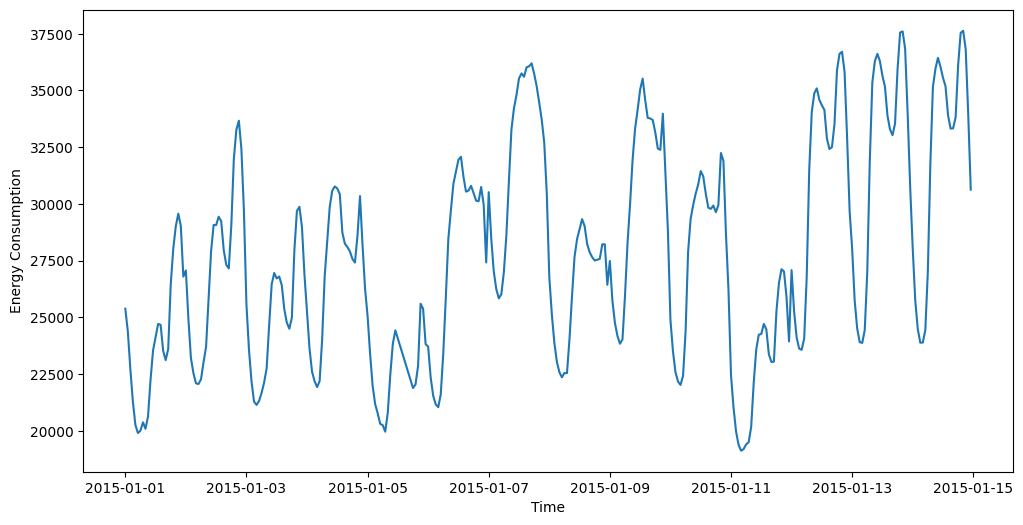

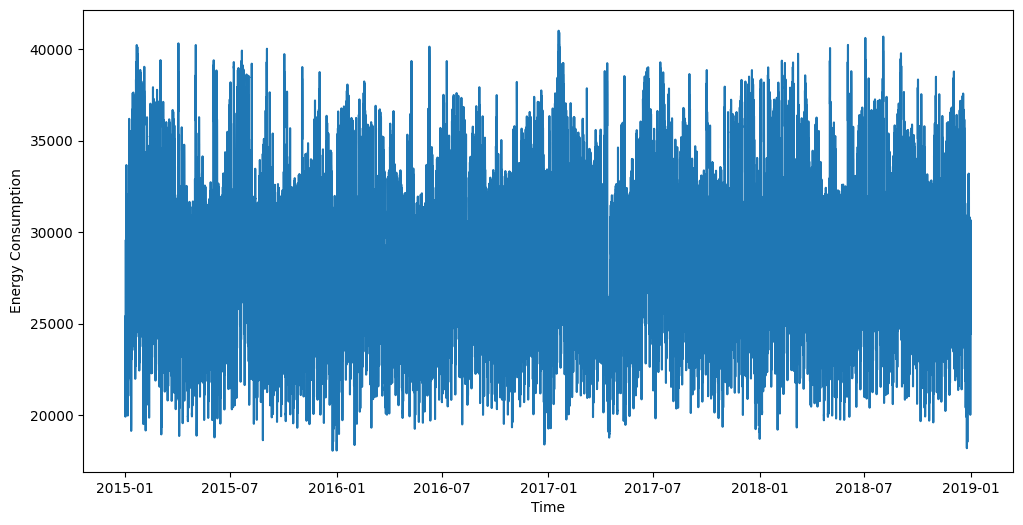

In [18]:
plt.figure(figsize=(12,6))

plt.plot(energy['Energy Consumption'][:24*7*2])
plt.xlabel('Time')
plt.ylabel('Energy Consumption')

plt.figure(figsize=(12,6))

plt.plot(energy['Energy Consumption'][:])
plt.xlabel('Time')
plt.ylabel('Energy Consumption')

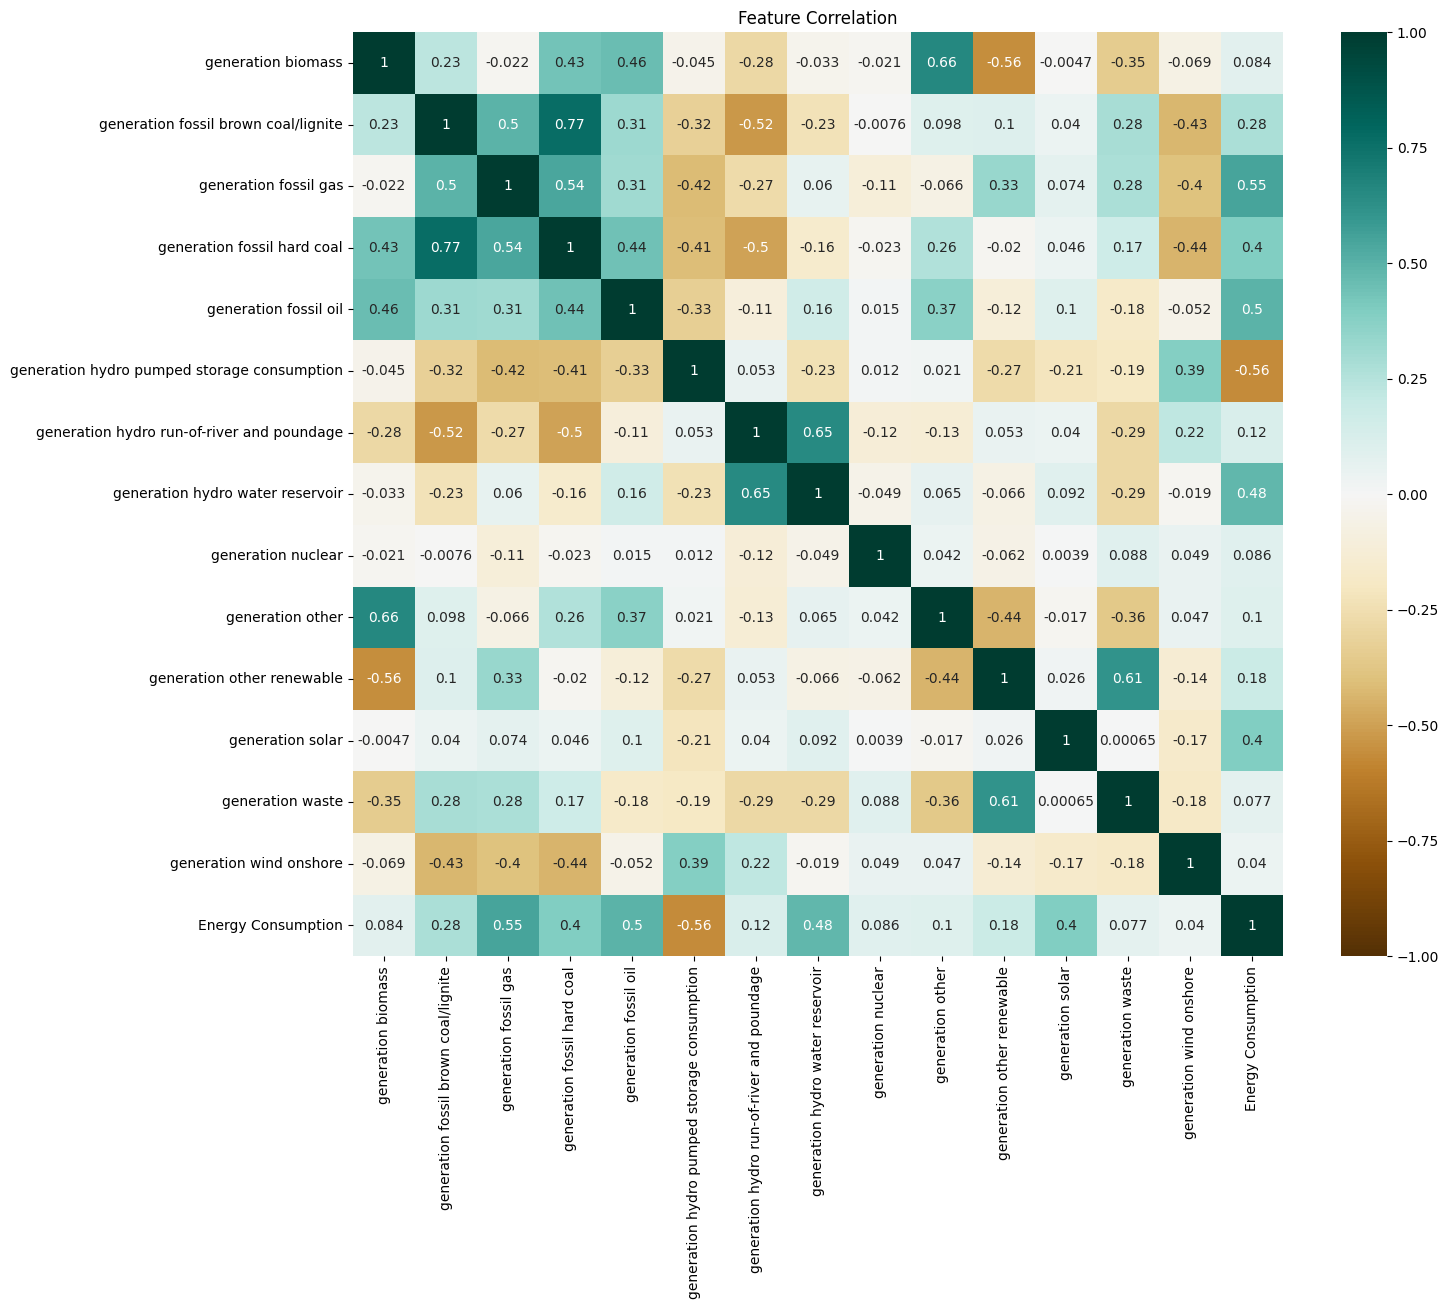

,generation biomass,generation fossil brown coal/lignite,generation fossil gas,generation fossil hard coal,generation fossil oil,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation nuclear,generation other,generation other renewable,generation solar,generation waste,generation wind onshore,Energy Consumption
time,,,,,,,,,,,,,,,
2018-12-31 19:00:00+01:00,297.0,0.0,7634.0,2628.0,178.0,1.0,1135.0,4836.0,6073.0,63.0,95.0,85.0,277.0,3113.0,30653.0
2018-12-31 20:00:00+01:00,296.0,0.0,7241.0,2566.0,174.0,1.0,1172.0,3931.0,6074.0,62.0,95.0,33.0,280.0,3288.0,29735.0
2018-12-31 21:00:00+01:00,292.0,0.0,7025.0,2422.0,168.0,50.0,1148.0,2831.0,6076.0,61.0,94.0,31.0,286.0,3503.0,28071.0
2018-12-31 22:00:00+01:00,293.0,0.0,6562.0,2293.0,163.0,108.0,1128.0,2068.0,6075.0,61.0,93.0,31.0,287.0,3586.0,25801.0
2018-12-31 23:00:00+01:00,290.0,0.0,6926.0,2166.0,163.0,108.0,1069.0,1686.0,6075.0,61.0,92.0,31.0,287.0,3651.0,24455.0


In [19]:

def feat_corr(input_df):
    corr = input_df.corr()
    plt.figure(figsize=(15,12))

    g=sns.heatmap(corr,annot=True,cmap="BrBG", vmin=-1, vmax=1)
    plt.title('Feature Correlation')


    return plt.show()
feat_corr(energy)

energy.tail(5)

In [20]:
energy["generation fossil total"] = energy['generation fossil hard coal'] + energy['generation fossil brown coal/lignite']
energy.drop(['generation fossil hard coal', 'generation fossil brown coal/lignite'], axis = 1, inplace = True)


In [34]:
pip install scikit-learn

  Using cached scikit_learn-1.5.0-cp311-cp311-win_amd64.whl.metadata (11 kB)
  Using cached scipy-1.13.1-cp311-cp311-win_amd64.whl.metadata (60 kB)
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
Using cached scikit_learn-1.5.0-cp311-cp311-win_amd64.whl (11.0 MB)
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
Using cached scipy-1.13.1-cp311-cp311-win_amd64.whl (46.2 MB)
Using cached threadpoolctl-3.5.0-py3-none-any.whl (18 kB)
Note: you may need to restart the kernel to use updated packages.


In [39]:

# Loading weather data
from sklearn.preprocessing import LabelEncoder

df_weather = pd.read_csv('weather_features.csv')
df_temp = df_weather.copy(deep = True)
labels = ['weather_id', 'weather_main','weather_description','weather_icon']
for col in labels:
    df_temp[col] = LabelEncoder().fit_transform(df_weather[col])
df_weather.tail(5)

energy.tail(5)
df_weather.shape

(178396, 17)

In [40]:
df_temp = df_weather.copy(deep = True)
labels = ['weather_id', 'weather_main','weather_description','weather_icon']
for col in labels:
    df_temp[col] = LabelEncoder().fit_transform(df_weather[col])
df_weather.tail(5)

energy.tail(5)

,generation biomass,generation fossil gas,generation fossil oil,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation nuclear,generation other,generation other renewable,generation solar,generation waste,generation wind onshore,Energy Consumption,generation fossil total
time,,,,,,,,,,,,,,
2018-12-31 19:00:00+01:00,297.0,7634.0,178.0,1.0,1135.0,4836.0,6073.0,63.0,95.0,85.0,277.0,3113.0,30653.0,2628.0
2018-12-31 20:00:00+01:00,296.0,7241.0,174.0,1.0,1172.0,3931.0,6074.0,62.0,95.0,33.0,280.0,3288.0,29735.0,2566.0
2018-12-31 21:00:00+01:00,292.0,7025.0,168.0,50.0,1148.0,2831.0,6076.0,61.0,94.0,31.0,286.0,3503.0,28071.0,2422.0
2018-12-31 22:00:00+01:00,293.0,6562.0,163.0,108.0,1128.0,2068.0,6075.0,61.0,93.0,31.0,287.0,3586.0,25801.0,2293.0
2018-12-31 23:00:00+01:00,290.0,6926.0,163.0,108.0,1069.0,1686.0,6075.0,61.0,92.0,31.0,287.0,3651.0,24455.0,2166.0


In [41]:
col_drop_name = ['weather_id', 'weather_main','weather_description','weather_icon', 'temp_min', 'temp_max']
# col_drop_name = ['weather_id', 'weather_main','weather_description','weather_icon']
df_weather.drop(col_drop_name, axis = 1 , inplace = True)
df_weather.tail(5)

energy.tail(5)

,generation biomass,generation fossil gas,generation fossil oil,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation nuclear,generation other,generation other renewable,generation solar,generation waste,generation wind onshore,Energy Consumption,generation fossil total
time,,,,,,,,,,,,,,
2018-12-31 19:00:00+01:00,297.0,7634.0,178.0,1.0,1135.0,4836.0,6073.0,63.0,95.0,85.0,277.0,3113.0,30653.0,2628.0
2018-12-31 20:00:00+01:00,296.0,7241.0,174.0,1.0,1172.0,3931.0,6074.0,62.0,95.0,33.0,280.0,3288.0,29735.0,2566.0
2018-12-31 21:00:00+01:00,292.0,7025.0,168.0,50.0,1148.0,2831.0,6076.0,61.0,94.0,31.0,286.0,3503.0,28071.0,2422.0
2018-12-31 22:00:00+01:00,293.0,6562.0,163.0,108.0,1128.0,2068.0,6075.0,61.0,93.0,31.0,287.0,3586.0,25801.0,2293.0
2018-12-31 23:00:00+01:00,290.0,6926.0,163.0,108.0,1069.0,1686.0,6075.0,61.0,92.0,31.0,287.0,3651.0,24455.0,2166.0


In [42]:
# Checking Nans and duplicates in each columns
def check_Nans_Dups(df_input):

    print('Number of Nans in each column :')

    print(df_input.isnull().sum())
    print()
    print(f'Number of duplicates in the dataframe : {df_input.duplicated().sum()}')
    return


check_Nans_Dups(df_weather)
df_weather.tail(5)



Number of Nans in each column :
dt_iso        0
city_name     0
temp          0
pressure      0
humidity      0
wind_speed    0
wind_deg      0
rain_1h       0
rain_3h       0
snow_3h       0
clouds_all    0
dtype: int64

Number of duplicates in the dataframe : 3076


,dt_iso,city_name,temp,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all
178391,2018-12-31 19:00:00+01:00,Seville,287.76,1028,54,3,30,0.0,0.0,0.0,0
178392,2018-12-31 20:00:00+01:00,Seville,285.76,1029,62,3,30,0.0,0.0,0.0,0
178393,2018-12-31 21:00:00+01:00,Seville,285.15,1028,58,4,50,0.0,0.0,0.0,0
178394,2018-12-31 22:00:00+01:00,Seville,284.15,1029,57,4,60,0.0,0.0,0.0,0
178395,2018-12-31 23:00:00+01:00,Seville,283.97,1029,70,3,50,0.0,0.0,0.0,0


In [43]:
df_weather = df_weather.reset_index().drop_duplicates()
df_weather.tail(5)



,index,dt_iso,city_name,temp,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all
178391,178391,2018-12-31 19:00:00+01:00,Seville,287.76,1028,54,3,30,0.0,0.0,0.0,0
178392,178392,2018-12-31 20:00:00+01:00,Seville,285.76,1029,62,3,30,0.0,0.0,0.0,0
178393,178393,2018-12-31 21:00:00+01:00,Seville,285.15,1028,58,4,50,0.0,0.0,0.0,0
178394,178394,2018-12-31 22:00:00+01:00,Seville,284.15,1029,57,4,60,0.0,0.0,0.0,0
178395,178395,2018-12-31 23:00:00+01:00,Seville,283.97,1029,70,3,50,0.0,0.0,0.0,0


In [44]:
df_weather['time'] = pd.to_datetime(df_weather['dt_iso'])
df_weather.drop(["dt_iso"] , axis = 1, inplace = True)
df_weather = df_weather.set_index('time')

df_weather.tail(5)



C:\Users\HP\AppData\Local\Temp\ipykernel_19908\788170072.py:1: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df_weather['time'] = pd.to_datetime(df_weather['dt_iso'])


,index,city_name,temp,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all
time,,,,,,,,,,,
2018-12-31 19:00:00+01:00,178391,Seville,287.76,1028,54,3,30,0.0,0.0,0.0,0
2018-12-31 20:00:00+01:00,178392,Seville,285.76,1029,62,3,30,0.0,0.0,0.0,0
2018-12-31 21:00:00+01:00,178393,Seville,285.15,1028,58,4,50,0.0,0.0,0.0,0
2018-12-31 22:00:00+01:00,178394,Seville,284.15,1029,57,4,60,0.0,0.0,0.0,0
2018-12-31 23:00:00+01:00,178395,Seville,283.97,1029,70,3,50,0.0,0.0,0.0,0


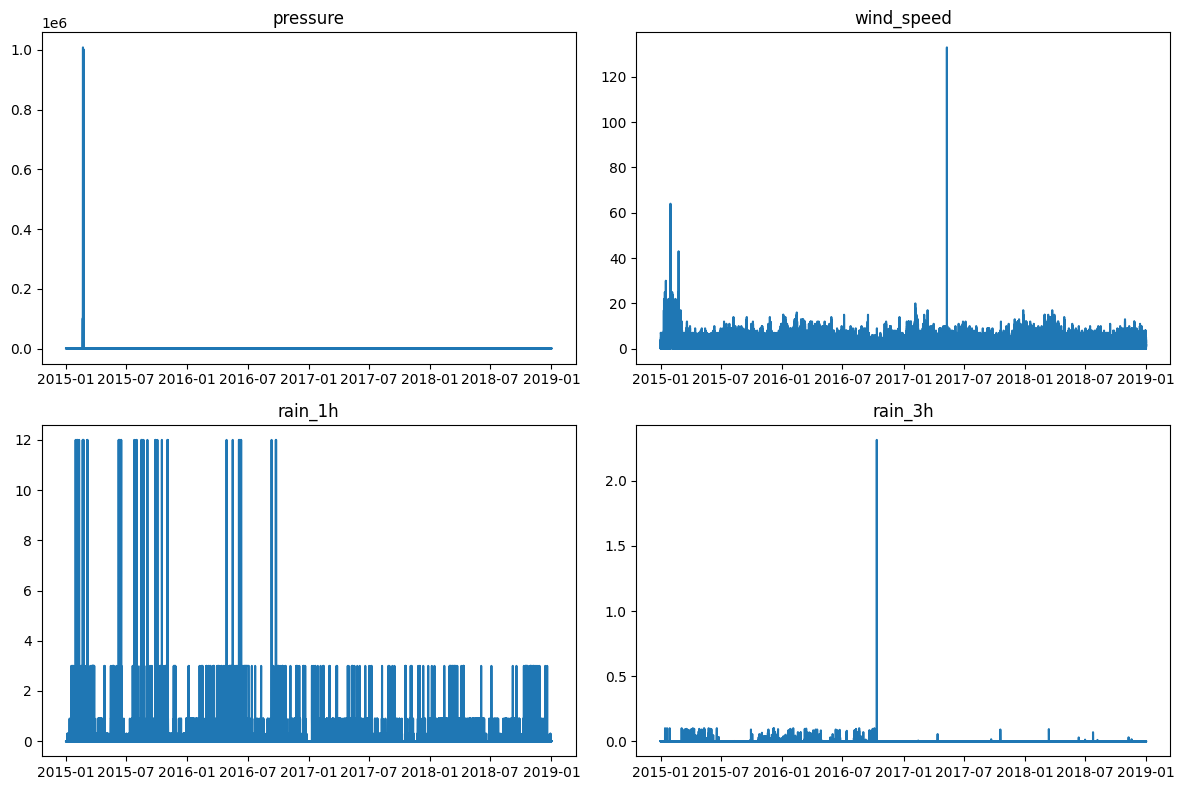

In [45]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

columns_to_plot = ['pressure', 'wind_speed', 'rain_1h', 'rain_3h']

for i, ax in enumerate(axes.flat):
    if i < len(columns_to_plot):
        ax.plot(df_weather.index, df_weather[columns_to_plot[i]])
        ax.set_title(columns_to_plot[i])
    else:
        ax.set_visible(False)

plt.tight_layout()
plt.show()
df_weather.tail(5)
df_weather.drop(["index"] , axis = 1, inplace = True)


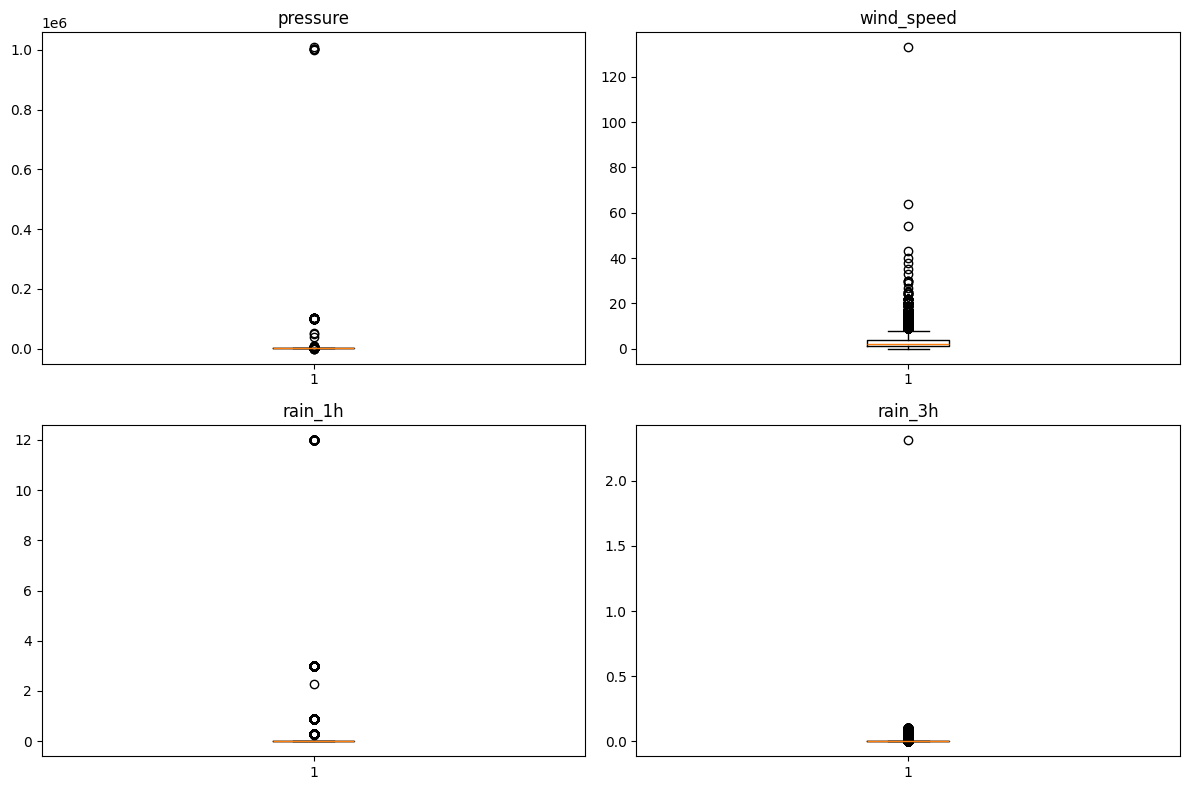

C:\Users\HP\AppData\Local\Temp\ipykernel_19908\2355131593.py:19: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_weather.interpolate(method ='linear', limit_direction ='forward', inplace = True)


In [46]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,8))

# select the columns to plot
columns_to_plot = ['pressure', 'wind_speed', 'rain_1h', 'rain_3h']

# loop through the subplots and plot each column
for i, ax in enumerate(axes.flat):
    if i < len(columns_to_plot):
        ax.boxplot(x = df_weather[columns_to_plot[i]])
        ax.set_title(columns_to_plot[i])
    else:
        ax.set_visible(False)

plt.tight_layout()  # adjust the spacing between subplots
plt.show()  # display the plotdf_weather.loc[df_weather['pressure']  > 1080,  'pressure'] = np.nan
df_weather.loc[df_weather['pressure']   < 870,  'pressure'] = np.nan
df_weather.loc[df_weather['wind_speed'] > 113, 'wind_speed'] = np.nan

df_weather.interpolate(method ='linear', limit_direction ='forward', inplace = True)

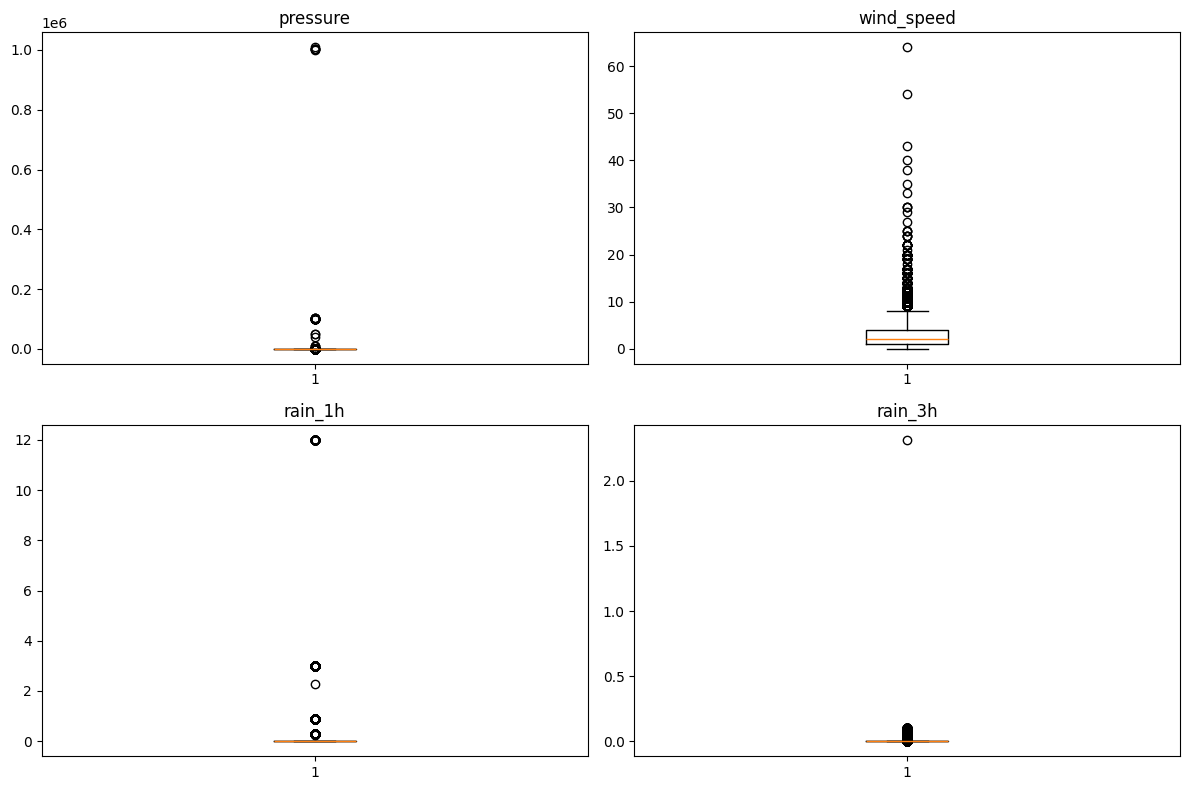

,city_name,temp,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all
time,,,,,,,,,,
2018-12-31 19:00:00+01:00,Seville,287.76,1028.0,54,3.0,30,0.0,0.0,0.0,0
2018-12-31 20:00:00+01:00,Seville,285.76,1029.0,62,3.0,30,0.0,0.0,0.0,0
2018-12-31 21:00:00+01:00,Seville,285.15,1028.0,58,4.0,50,0.0,0.0,0.0,0
2018-12-31 22:00:00+01:00,Seville,284.15,1029.0,57,4.0,60,0.0,0.0,0.0,0
2018-12-31 23:00:00+01:00,Seville,283.97,1029.0,70,3.0,50,0.0,0.0,0.0,0


In [47]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,8))

# select the columns to plot
columns_to_plot = ['pressure', 'wind_speed', 'rain_1h', 'rain_3h']

# loop through the subplots and plot each column
for i, ax in enumerate(axes.flat):
    if i < len(columns_to_plot):
        ax.boxplot(x = df_weather[columns_to_plot[i]])
        ax.set_title(columns_to_plot[i])
    else:
        ax.set_visible(False)

plt.tight_layout()  # adjust the spacing between subplots
plt.show()  # display the plot

df_weather.tail(5)

In [48]:
# be sure to drop rain_h3
df_weather.drop(['rain_3h'], axis = 1 , inplace = True)

In [49]:
print(f'Number of samples in df_energy is {energy.shape[0]}')

city_list = df_weather['city_name'].unique()
grouped_weather = df_weather.groupby('city_name')

for city in city_list:


    print(f'Number of samples in df_weather in {city} is {grouped_weather.get_group(city).shape[0]}')
df_weather.tail(5)

Number of samples in df_energy is 35064
Number of samples in df_weather in Valencia is 35145
Number of samples in df_weather in Madrid is 36267
Number of samples in df_weather in Bilbao is 35951
Number of samples in df_weather in  Barcelona is 35476
Number of samples in df_weather in Seville is 35557


,city_name,temp,pressure,humidity,wind_speed,wind_deg,rain_1h,snow_3h,clouds_all
time,,,,,,,,,
2018-12-31 19:00:00+01:00,Seville,287.76,1028.0,54,3.0,30,0.0,0.0,0
2018-12-31 20:00:00+01:00,Seville,285.76,1029.0,62,3.0,30,0.0,0.0,0
2018-12-31 21:00:00+01:00,Seville,285.15,1028.0,58,4.0,50,0.0,0.0,0
2018-12-31 22:00:00+01:00,Seville,284.15,1029.0,57,4.0,60,0.0,0.0,0
2018-12-31 23:00:00+01:00,Seville,283.97,1029.0,70,3.0,50,0.0,0.0,0


In [50]:
df_weather.tail(5)
df_weather.shape

(178396, 9)

In [51]:
df_weather_cleaned = df_weather.reset_index().drop_duplicates(subset=['time', 'city_name'], keep='first').set_index('time')

In [52]:
df_weather_cleaned.head()

,city_name,temp,pressure,humidity,wind_speed,wind_deg,rain_1h,snow_3h,clouds_all
time,,,,,,,,,
2015-01-01 00:00:00+01:00,Valencia,270.475,1001.0,77,1.0,62,0.0,0.0,0
2015-01-01 01:00:00+01:00,Valencia,270.475,1001.0,77,1.0,62,0.0,0.0,0
2015-01-01 02:00:00+01:00,Valencia,269.686,1002.0,78,0.0,23,0.0,0.0,0
2015-01-01 03:00:00+01:00,Valencia,269.686,1002.0,78,0.0,23,0.0,0.0,0
2015-01-01 04:00:00+01:00,Valencia,269.686,1002.0,78,0.0,23,0.0,0.0,0


In [53]:
print(f'Number of samples in df_energy is {energy.shape[0]}')

city_list = df_weather['city_name'].unique()
grouped_weather = df_weather_cleaned.groupby('city_name')

for city in city_list:
    print(f'Number of samples in df_weather in {city} is {grouped_weather.get_group(city).shape[0]}')

Number of samples in df_energy is 35064
Number of samples in df_weather in Valencia is 35064
Number of samples in df_weather in Madrid is 35064
Number of samples in df_weather in Bilbao is 35064
Number of samples in df_weather in  Barcelona is 35064
Number of samples in df_weather in Seville is 35064


In [54]:
energy.shape

(35064, 14)

In [55]:
energy.tail(5)

,generation biomass,generation fossil gas,generation fossil oil,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation nuclear,generation other,generation other renewable,generation solar,generation waste,generation wind onshore,Energy Consumption,generation fossil total
time,,,,,,,,,,,,,,
2018-12-31 19:00:00+01:00,297.0,7634.0,178.0,1.0,1135.0,4836.0,6073.0,63.0,95.0,85.0,277.0,3113.0,30653.0,2628.0
2018-12-31 20:00:00+01:00,296.0,7241.0,174.0,1.0,1172.0,3931.0,6074.0,62.0,95.0,33.0,280.0,3288.0,29735.0,2566.0
2018-12-31 21:00:00+01:00,292.0,7025.0,168.0,50.0,1148.0,2831.0,6076.0,61.0,94.0,31.0,286.0,3503.0,28071.0,2422.0
2018-12-31 22:00:00+01:00,293.0,6562.0,163.0,108.0,1128.0,2068.0,6075.0,61.0,93.0,31.0,287.0,3586.0,25801.0,2293.0
2018-12-31 23:00:00+01:00,290.0,6926.0,163.0,108.0,1069.0,1686.0,6075.0,61.0,92.0,31.0,287.0,3651.0,24455.0,2166.0


In [56]:
# Reset the indices of energy and newweather
newweather = df_weather_cleaned.reset_index(drop=True)
# newweather.tail(5)
newweather.drop(columns=['city_name','clouds_all','snow_3h','rain_1h'], inplace=True)

In [57]:
newweather.tail(5)

,temp,pressure,humidity,wind_speed,wind_deg
175315,287.76,1028.0,54,3.0,30
175316,285.76,1029.0,62,3.0,30
175317,285.15,1028.0,58,4.0,50
175318,284.15,1029.0,57,4.0,60
175319,283.97,1029.0,70,3.0,50


In [58]:
# Reset the indices of energy and newweather
newweather = newweather.reset_index(drop=True)
energy_reset_index = energy.reset_index(drop=True)


# Merge the reset DataFrames
merged_data = pd.concat([energy_reset_index, newweather], axis=1)

In [59]:
merged_data.tail(5)

,generation biomass,generation fossil gas,generation fossil oil,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation nuclear,generation other,generation other renewable,generation solar,generation waste,generation wind onshore,Energy Consumption,generation fossil total,temp,pressure,humidity,wind_speed,wind_deg
175315,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,287.76,1028.0,54,3.0,30
175316,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,285.76,1029.0,62,3.0,30
175317,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,285.15,1028.0,58,4.0,50
175318,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,284.15,1029.0,57,4.0,60
175319,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,283.97,1029.0,70,3.0,50


In [60]:
merged_data.dropna

<bound method DataFrame.dropna of         generation biomass  generation fossil gas  generation fossil oil  \
0                    447.0                 4844.0                  162.0   
1                    449.0                 5196.0                  158.0   
2                    448.0                 4857.0                  157.0   
3                    438.0                 4314.0                  160.0   
4                    428.0                 4130.0                  156.0   
...                    ...                    ...                    ...   
175315                 NaN                    NaN                    NaN   
175316                 NaN                    NaN                    NaN   
175317                 NaN                    NaN                    NaN   
175318                 NaN                    NaN                    NaN   
175319                 NaN                    NaN                    NaN   

        generation hydro pumped storage consumption  

In [61]:
cleaned_data = merged_data.dropna()


In [62]:
cleaned_data.tail(5)

,generation biomass,generation fossil gas,generation fossil oil,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation nuclear,generation other,generation other renewable,generation solar,generation waste,generation wind onshore,Energy Consumption,generation fossil total,temp,pressure,humidity,wind_speed,wind_deg
35059,297.0,7634.0,178.0,1.0,1135.0,4836.0,6073.0,63.0,95.0,85.0,277.0,3113.0,30653.0,2628.0,285.64,1028.0,62,2.0,140
35060,296.0,7241.0,174.0,1.0,1172.0,3931.0,6074.0,62.0,95.0,33.0,280.0,3288.0,29735.0,2566.0,283.14,1029.0,71,1.0,242
35061,292.0,7025.0,168.0,50.0,1148.0,2831.0,6076.0,61.0,94.0,31.0,286.0,3503.0,28071.0,2422.0,281.66,1029.0,81,3.0,300
35062,293.0,6562.0,163.0,108.0,1128.0,2068.0,6075.0,61.0,93.0,31.0,287.0,3586.0,25801.0,2293.0,280.14,1029.0,81,2.0,310
35063,290.0,6926.0,163.0,108.0,1069.0,1686.0,6075.0,61.0,92.0,31.0,287.0,3651.0,24455.0,2166.0,279.14,1029.0,75,2.0,300


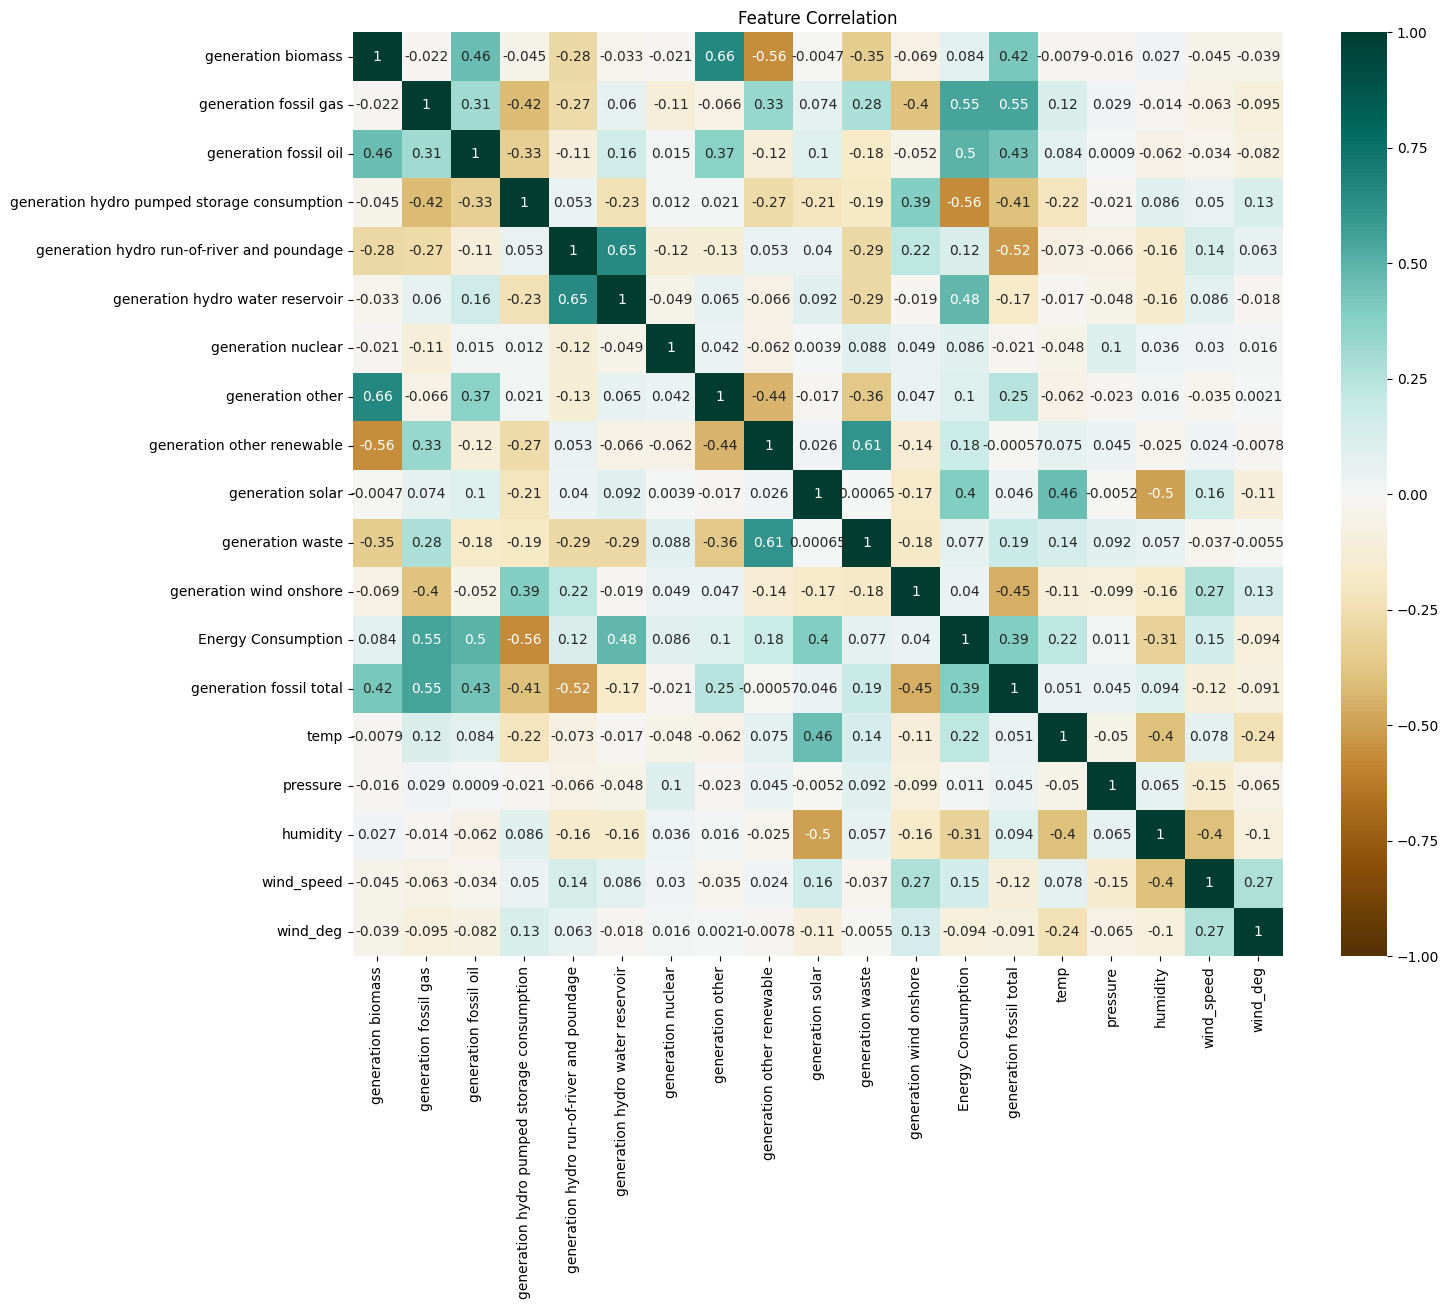

In [63]:
feat_corr(cleaned_data)

In [ ]:
# !pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 26.3 MB/s eta 0:00:00


In [ ]:
# from pmdarima import auto_arima
# stepwise_fit = auto_arima(cleaned_data['Energy Consumption'], trace=True,
# suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=578773.407, Time=93.69 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=608947.816, Time=1.86 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=584645.310, Time=4.26 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=590386.556, Time=16.24 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=608945.816, Time=0.51 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=583262.635, Time=12.87 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=578863.280, Time=41.29 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=578816.084, Time=58.27 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=578768.618, Time=78.61 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=583094.754, Time=21.67 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=578801.378, Time=91.90 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=577435.313, Time=87.03 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=inf, Time=45.26 sec
 ARIMA(3,1,4)(0,0,0)[0] intercept   : AIC=inf, Time=108.21 sec
 ARIMA(

In [ ]:
# cleaned_data.shape

(35064, 19)

In [ ]:
# train_data = cleaned_data.iloc[:-2000]  # All data except the last 20 entries
# test_data =  cleaned_data.iloc[-2000:]
# train_data.shape, test_data.shape

((33064, 19), (2000, 19))

In [ ]:
# from statsmodels.tsa.arima.model import ARIMA

# model = ARIMA(cleaned_data['Energy Consumption'], order=(1, 0, 5))
# model = model.fit()
# model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:     Energy Consumption   No. Observations:                35064
Model:                 ARIMA(1, 0, 5)   Log Likelihood             -289754.334
Date:                Sat, 08 Jun 2024   AIC                         579524.668
Time:                        07:00:15   BIC                         579592.387
Sample:                             0   HQIC                        579546.236
                              - 35064                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        2.87e+04     91.152    314.842      0.000    2.85e+04    2.89e+04
ar.L1          0.7866      0.007    116.480      0.000       0.773       0.800
ma.L1          0.9313      0.006    154.562      0.000       0.919       0.943
ma.L2          0.7112      0.010     70.836      0.000       0.692       0.731
ma.L3          0.5038      0.012     41.870      0.000       0.480       0.527
ma.L4          0.3164      0.011     28.872      0.000       0.295       0.338
ma.L5          0.1194      0.007     17.957      0.000       0.106       0.132
sigma2      9.395e+05   3237.593    290.181      0.000    9.33e+05    9.46e+05
===================================================================================
Ljung-Box (L1) (Q):                   4.08   Jarque-Bera (JB):           1800284.61
Prob(Q):                              0.04   Prob(JB):                         0.00
Heteroskedasticity (H):               0.83   Skew:                             0.55
Prob(H) (two-sided):                  0.00   Kurtosis:                        38.09
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<Axes: >

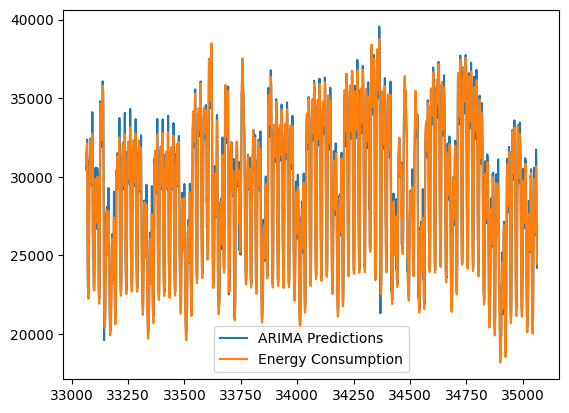

In [ ]:
# start=len(train_data)
# end=len(train_data)+len(test_data)-1
# pred=model.predict(start=start,end=end,typ='levels').rename('ARIMA Predictions')
# pred.plot(legend=True)
# test_data['Energy Consumption'].plot(legend=True)

In [ ]:
# from sklearn.metrics import mean_squared_error

# mse = mean_squared_error(test_data['Energy Consumption'], pred )


# rmse = np.sqrt(mse)
# print(f'RMSE: {rmse}')


RMSE: 869.5451882107079


In [ ]:
# from sklearn.metrics import mean_squared_error
# import numpy as np

# mse = mean_squared_error(test_data['Energy Consumption'], pred)
# rmse = np.sqrt(mse)

# r2_score = 1 - (mse / np.var(test_data['Energy Consumption']))

# print(f'RMSE: {rmse}')
# print(f'R2 Score: {r2_score}')

RMSE: 869.5451882107079
R2 Score: 0.9650442576435228


In [ ]:
# import pandas as pd
# import numpy as np
# from statsmodels.tsa.arima.model import ARIMA

# def predict_energy_arima(existing_model, cleaned_data, input_data, forecast_horizon=1):
#     """
#     Predict future energy consumption using an existing ARIMA model based on provided input data.

#     Parameters:
#     existing_model (ARIMAResults): Pre-fitted ARIMA model.
#     cleaned_data (DataFrame): Historical data.
#     input_data (dict): The last five days of energy generation data.
#     forecast_horizon (int): The number of future steps to forecast.

#     Returns:
#     DataFrame: Forecasted energy consumption.
#     """
#     features = [
#         'generation-biomass', 'generation-fossil-gas', 'generation-fossil-oil',
#         'generation-hydro-pumped-storage-consumption', 'generation-hydro-run-of-river-and-poundage',
#         'generation-hydro-water-reservoir', 'generation-nuclear', 'generation-other',
#         'generation-other-renewable', 'generation-solar', 'generation-waste'
#     ]

#     # Restructure input data into a DataFrame
#     days_data = []
#     for day in range(1, 6):
#         day_data = {feature: input_data.get(f'{feature}_day{day}', 0) for feature in features}
#         days_data.append(day_data)

#     input_df = pd.DataFrame(days_data)

#     # Sum each row to get total energy consumption per day
#     input_df['Energy Consumption'] = input_df.sum(axis=1)

#     # Predict using the pre-fitted ARIMA model
#     forecast = model.forecast(steps=forecast_horizon)

#     # Generate dates for the forecast
#     last_date = cleaned_data.index[-1]  # Assuming the last date in cleaned_data is the most recent
#     forecast_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=forecast_horizon)

#     # Create a DataFrame for the forecast
#     forecast_df = pd.DataFrame({'date': forecast_dates, 'forecast': forecast})
#     forecast_df.set_index('date', inplace=True)


#     return forecast_df

# # Define input data for the last five days
# input_data = {
#     'generation-biomass_day1': 100,
#     'generation-fossil-gas_day1': 200,
#     'generation-fossil-oil_day1': 150,
#     'generation-hydro-pumped-storage-consumption_day1': 120,
#     'generation-hydro-run-of-river-and-poundage_day1': 80,
#     'generation-hydro-water-reservoir_day1': 180,
#     'generation-nuclear_day1': 250,
#     'generation-other_day1': 90,
#     'generation-other-renewable_day1': 300,
#     'generation-solar_day1': 400,
#     'generation-waste_day1': 110,
#     'generation-biomass_day2': 110,
#     'generation-fossil-gas_day2': 210,
#     'generation-fossil-oil_day2': 160,
#     'generation-hydro-pumped-storage-consumption_day2': 130,
#     'generation-hydro-run-of-river-and-poundage_day2': 90,
#     'generation-hydro-water-reservoir_day2': 190,
#     'generation-nuclear_day2': 260,
#     'generation-other_day2': 100,
#     'generation-other-renewable_day2': 310,
#     'generation-solar_day2': 420,
#     'generation-waste_day2': 120,
#     'generation-biomass_day3': 120,
#     'generation-fossil-gas_day3': 220,
#     'generation-fossil-oil_day3': 170,
#     'generation-hydro-pumped-storage-consumption_day3': 140,
#     'generation-hydro-run-of-river-and-poundage_day3': 100,
#     'generation-hydro-water-reservoir_day3': 200,
#     'generation-nuclear_day3': 270,
#     'generation-other_day3': 110,
#     'generation-other-renewable_day3': 320,
#     'generation-solar_day3': 430,
#     'generation-waste_day3': 130,
#     'generation-biomass_day4': 130,
#     'generation-fossil-gas_day4': 230,
#     'generation-fossil-oil_day4': 180,
#     'generation-hydro-pumped-storage-consumption_day4': 150,
#     'generation-hydro-run-of-river-and-poundage_day4': 110,
#     'generation-hydro-water-reservoir_day4': 210,
#     'generation-nuclear_day4': 280,
#     'generation-other_day4': 120,
#     'generation-other-renewable_day4': 330,
#     'generation-solar_day4': 440,
#     'generation-waste_day4': 140,
#     'generation-biomass_day5': 140,
#     'generation-fossil-gas_day5': 240,
#     'generation-fossil-oil_day5': 190,
#     'generation-hydro-pumped-storage-consumption_day5': 160,
#     'generation-hydro-run-of-river-and-poundage_day5': 120,
#     'generation-hydro-water-reservoir_day5': 220,
#     'generation-nuclear_day5': 290,
#     'generation-other_day5': 130,
#     'generation-other-renewable_day5': 340,
#     'generation-solar_day5': 450,
#     'generation-waste_day5': 150
# }

# # Assume cleaned_data is a DataFrame with historical energy consumption data
# date_rng = pd.date_range(start='2023-01-01', end='2023-02-28', freq='D')
# cleaned_data = pd.DataFrame(date_rng, columns=['date'])
# cleaned_data['Energy Consumption'] = np.random.randint(1000, 5000, size=(len(date_rng)))
# cleaned_data.set_index('date', inplace=True)

# # Load the pre-fitted ARIMA model
# # Replace `arima_model_fit` with your actual fitted model variable
# arima_model_fit = ARIMA(cleaned_data['Energy Consumption'], order=(1, 0, 5)).fit()

# # Call the predict_energy_arima function with the pre-fitted ARIMA model and input data
# predictions_df = predict_energy_arima(arima_model_fit, cleaned_data, input_data)

# # Print the predictions
# print("Predictions:\n", predictions_df)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Predictions:
                 forecast
date                    
2023-03-01  23933.433308


In [ ]:
# import pandas as pd
# from statsmodels.tsa.arima.model import ARIMA
# import warnings

# # Ignore warnings for cleaner output
# warnings.filterwarnings('ignore')

# def predict_energy_arima(existing_model, cleaned_data, input_dates, input_data):
#     """
#     Predict future energy consumption using an existing ARIMA model based on provided input data.

#     Parameters:
#     existing_model (ARIMAResults): Pre-fitted ARIMA model.
#     cleaned_data (DataFrame): Historical data with 'Energy Consumption'.
#     input_dates (list): List of dates for which predictions are needed.
#     input_data (dict): The energy generation data for these dates.

#     Returns:
#     float: The predicted energy consumption value for the last input date.
#     """
#     # Check if input dates are within the existing dataset
#     last_date_in_data = cleaned_data.index[-1]
#     input_date_range = pd.to_datetime(input_dates)

#     if input_date_range.max() <= last_date_in_data:
#         # Input dates are within the existing dataset; use existing model for prediction
#         predictions = existing_model.predict(start=input_date_range[0], end=input_date_range[-1])
#         last_predicted_value = predictions[-1]
#     else:
#         # Extract features for the new input data
#         features = [
#             'generation-biomass', 'generation-fossil-gas', 'generation-fossil-oil',
#             'generation-hydro-pumped-storage-consumption', 'generation-hydro-run-of-river-and-poundage',
#             'generation-hydro-water-reservoir', 'generation-nuclear', 'generation-other',
#             'generation-other-renewable', 'generation-solar', 'generation-waste'
#         ]

#         # Create a DataFrame for input data
#         input_df = pd.DataFrame(index=pd.to_datetime(input_dates))
#         for feature in features:
#             input_df[feature] = [input_data.get(f'{feature}_day{idx+1}', 0) for idx in range(len(input_dates))]

#         # Calculate energy consumption for each input date
#         input_df['Energy Consumption'] = input_df.sum(axis=1)

#         # Extend the original data with the input data
#         extended_data = pd.concat([cleaned_data, input_df])

#         # Determine the forecast horizon
#         forecast_horizon = (input_date_range[-1] - last_date_in_data).days
#         if forecast_horizon <= 0:
#             raise ValueError("The provided input dates must be after the last date in the original dataset.")

#         # Refit the ARIMA model on the extended data
#         extended_model = ARIMA(extended_data['Energy Consumption'], order=(1, 0, 1)).fit()

#         # Forecast future energy consumption
#         forecast = extended_model.forecast(steps=forecast_horizon)
#         last_predicted_value = forecast[-1]

#     return last_predicted_value

# # Example user input for dates and energy generation data
# input_dates = [
#     '2023-01-08', '2023-01-09', '2023-01-10', '2023-01-11', '2023-01-12'
# ]
# input_data = {
#     'generation-biomass_day1': 100,
#     'generation-fossil-gas_day1': 200,
#     'generation-fossil-oil_day1': 150,
#     'generation-hydro-pumped-storage-consumption_day1': 120,
#     'generation-hydro-run-of-river-and-poundage_day1': 80,
#     'generation-hydro-water-reservoir_day1': 180,
#     'generation-nuclear_day1': 250,
#     'generation-other_day1': 90,
#     'generation-other-renewable_day1': 300,
#     'generation-solar_day1': 400,
#     'generation-waste_day1': 110,
#     'generation-biomass_day2': 110,
#     'generation-fossil-gas_day2': 210,
#     'generation-fossil-oil_day2': 160,
#     'generation-hydro-pumped-storage-consumption_day2': 130,
#     'generation-hydro-run-of-river-and-poundage_day2': 90,
#     'generation-hydro-water-reservoir_day2': 190,
#     'generation-nuclear_day2': 260,
#     'generation-other_day2': 100,
#     'generation-other-renewable_day2': 310,
#     'generation-solar_day2': 420,
#     'generation-waste_day2': 120,
#     'generation-biomass_day3': 120,
#     'generation-fossil-gas_day3': 220,
#     'generation-fossil-oil_day3': 170,
#     'generation-hydro-pumped-storage-consumption_day3': 140,
#     'generation-hydro-run-of-river-and-poundage_day3': 100,
#     'generation-hydro-water-reservoir_day3': 200,
#     'generation-nuclear_day3': 270,
#     'generation-other_day3': 110,
#     'generation-other-renewable_day3': 320,
#     'generation-solar_day3': 430,
#     'generation-waste_day3': 130,
#     'generation-biomass_day4': 130,
#     'generation-fossil-gas_day4': 230,
#     'generation-fossil-oil_day4': 180,
#     'generation-hydro-pumped-storage-consumption_day4': 150,
#     'generation-hydro-run-of-river-and-poundage_day4': 110,
#     'generation-hydro-water-reservoir_day4': 210,
#     'generation-nuclear_day4': 280,
#     'generation-other_day4': 120,
#     'generation-other-renewable_day4': 330,
#     'generation-solar_day4': 440,
#     'generation-waste_day4': 140,
#     'generation-biomass_day5': 140,
#     'generation-fossil-gas_day5': 240,
#     'generation-fossil-oil_day5': 190,
#     'generation-hydro-pumped-storage-consumption_day5': 160,
#     'generation-hydro-run-of-river-and-poundage_day5': 120,
#     'generation-hydro-water-reservoir_day5': 220,
#     'generation-nuclear_day5': 290,
#     'generation-other_day5': 130,
#     'generation-other-renewable_day5': 340,
#     'generation-solar_day5': 450,
#     'generation-waste_day5': 150
# }

# # Example historical data provided by the user
# historical_data = {
#     'dates': ['2023-01-01', '2023-01-02', '2023-01-03', '2023-01-04', '2023-01-05', '2023-01-06', '2023-01-07'],
#     'energy_consumption': [1000, 1500, 1300, 1600, 1800, 1700, 1400]
# }

# # Convert historical data into a DataFrame
# cleaned_data = pd.DataFrame({
#     'date': pd.to_datetime(historical_data['dates']),
#     'Energy Consumption': historical_data['energy_consumption']
# }).set_index('date')

# # Load and fit the ARIMA model on historical data
# arima_model_fit = ARIMA(cleaned_data['Energy Consumption'], order=(1, 0, 1)).fit()

# # Predict energy consumption using the updated predict_energy_arima function
# last_prediction = predict_energy_arima(arima_model_fit, cleaned_data, input_dates, input_data)

# # Print the last predicted value
# print("Last Predicted Energy Consumption:", last_prediction)


Last Predicted Energy Consumption: 2119.9807379537538


In [ ]:
# !pip install --upgrade gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 43.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.0/92.0 kB 9.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.1/318.1 kB 22.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.5/142.5 kB 15.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.8/8.8 MB 51.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.2/47.2 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.4/62.4 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 6.8 MB/s et

In [ ]:
# import pandas as pd
# import numpy as np
# import gradio as gr
# import matplotlib.pyplot as plt
# from statsmodels.tsa.arima.model import ARIMA

# # Load your ARIMA model (replace with your actual model)
# # arima_model_fit = ARIMA(cleaned_data['Energy Consumption'], order=(1, 0, 5)).fit()

# # Define the features used by the model
# features = [
#     'generation-biomass', 'generation-fossil-gas', 'generation-fossil-oil',
#     'generation-hydro-pumped-storage-consumption', 'generation-hydro-run-of-river-and-poundage',
#     'generation-hydro-water-reservoir', 'generation-nuclear', 'generation-other',
#     'generation-other-renewable', 'generation-solar', 'generation-waste'
# ]

# def create_lagged_features(df, lags):
#     """
#     Create lagged features for a DataFrame.

#     Parameters:
#     df (DataFrame): The input DataFrame with original features.
#     lags (int): The number of lagged time steps to include.

#     Returns:
#     DataFrame: DataFrame with lagged features.
#     """
#     lagged_df = pd.DataFrame()
#     for col in df.columns:
#         for lag in range(1, lags + 1):
#             lagged_df[f'{col}_lag{lag}'] = df[col].shift(lag)

#     # Drop rows with NaN values caused by the lagging
#     lagged_df.dropna(inplace=True)

#     return lagged_df

# def predict_energy_arima(existing_model, cleaned_data, input_data, forecast_horizon=10):
#     """
#     Predict future energy consumption using an existing ARIMA model based on provided input data.

#     Parameters:
#     existing_model (ARIMAResults): Pre-fitted ARIMA model.
#     cleaned_data (DataFrame): Historical data.
#     input_data (dict): The last five days of energy generation data.
#     forecast_horizon (int): The number of future steps to forecast.

#     Returns:
#     DataFrame: Forecasted energy consumption.
#     """
#     # List of features used by the model
#     features = [
#         'generation-biomass', 'generation-fossil-gas', 'generation-fossil-oil',
#         'generation-hydro-pumped-storage-consumption', 'generation-hydro-run-of-river-and-poundage',
#         'generation-hydro-water-reservoir', 'generation-nuclear', 'generation-other',
#         'generation-other-renewable', 'generation-solar', 'generation-waste'
#     ]

#     # Restructure input data into a DataFrame
#     days_data = []
#     for day in range(1, 6):
#         day_data = {feature: input_data.get(f'{feature}_day{day}', 0) for feature in features}
#         days_data.append(day_data)

#     input_df = pd.DataFrame(days_data)

#     # Sum each row to get total energy consumption per day
#     input_df['Energy Consumption'] = input_df.sum(axis=1)

#     # Predict using the pre-fitted ARIMA model
#     forecast = existing_model.forecast(steps=forecast_horizon)

#     # Generate dates for the forecast
#     last_date = cleaned_data.index[-1]  # Assuming the last date in cleaned_data is the most recent
#     forecast_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=forecast_horizon)

#     # Create a DataFrame for the forecast
#     forecast_df = pd.DataFrame({'date': forecast_dates, 'forecast': forecast})
#     forecast_df.set_index('date', inplace=True)

#     return forecast_df

# def display_forecast_plot(forecast_df):
#     """
#     Display a line plot showing historical data and forecasted energy consumption.

#     Parameters:
#     forecast_df (DataFrame): Forecasted energy consumption data.

#     Returns:
#     plt.Figure: Matplotlib figure object.
#     """
#     # Plot historical data
#     plt.plot(cleaned_data.index, cleaned_data['Energy Consumption'], label='Historical Data', color='blue')

#     # Plot forecasted data
#     plt.plot(forecast_df.index, forecast_df['forecast'], label='Forecast', color='red')

#     plt.xlabel('Date')
#     plt.ylabel('Energy Consumption')
#     plt.title('Energy Consumption Forecast')
#     plt.legend()
#     plt.grid(True)

#     return plt.gcf()

# # Define manual input components for Gradio
# manual_inputs = []
# for day in range(1, 6):
#     for feature in features:
#         manual_inputs.append(gr.Slider(
#             minimum=0, maximum=1000, step=0.1,
#             label=f'{feature.replace("_", " ").capitalize()} (Day {day})'
#         ))

# # Define the Gradio interface
# interface = gr.Interface(
#     fn=predict_energy_arima,
#     inputs=[gr.File(label="Upload CSV File (Optional)")] + manual_inputs,
#     outputs=[gr.Image(type="numpy", label="Energy Consumption Forecast")],
#     title="Energy Consumption Forecast using ARIMA",
#     description="Predict future energy consumption based on the last five days of energy generation data using ARIMA model.",
# )

# # Launch the interface
# interface.launch()


/usr/local/lib/python3.10/dist-packages/gradio/utils.py:1008: UserWarning: Expected maximum 4 arguments for function <function predict_energy_arima at 0x788155981bd0>, received 56.
ERROR:    Exception in ASGI application
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/gradio/routes.py", line 403, in main
    return templates.TemplateResponse(
  File "/usr/local/lib/python3.10/dist-packages/starlette/templating.py", line 229, in TemplateResponse
    template = self.get_template(name)
  File "/usr/local/lib/python3.10/dist-packages/starlette/templating.py", line 143, in get_template
    return self.env.get_template(name)
  File "/usr/local/lib/python3.10/dist-packages/jinja2/environment.py", line 1013, in get_template
    return self._load_template(name, globals)
  File "/usr/local/lib/python3.10/dist-packages/jinja2/environment.py", line 972, in _load_template
    template = self.loader.load(self, name, self.make_globals(globals))
  File "/usr/local/li

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).



ERROR:    Exception in ASGI application
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/gradio/routes.py", line 403, in main
    return templates.TemplateResponse(
  File "/usr/local/lib/python3.10/dist-packages/starlette/templating.py", line 229, in TemplateResponse
    template = self.get_template(name)
  File "/usr/local/lib/python3.10/dist-packages/starlette/templating.py", line 143, in get_template
    return self.env.get_template(name)
  File "/usr/local/lib/python3.10/dist-packages/jinja2/environment.py", line 1013, in get_template
    return self._load_template(name, globals)
  File "/usr/local/lib/python3.10/dist-packages/jinja2/environment.py", line 972, in _load_template
    template = self.loader.load(self, name, self.make_globals(globals))
  File "/usr/local/lib/python3.10/dist-packages/jinja2/loaders.py", line 126, in load
    source, filename, uptodate = self.get_source(environment, name)
  File "/usr/local/lib/python3.10/dist-packages/

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://3989cc4a8c55200951.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


Streaming output truncated to the last 5000 lines.
    await app(scope, receive, sender)
  File "/usr/local/lib/python3.10/dist-packages/starlette/routing.py", line 756, in __call__
    await self.middleware_stack(scope, receive, send)
  File "/usr/local/lib/python3.10/dist-packages/starlette/routing.py", line 776, in app
    await route.handle(scope, receive, send)
  File "/usr/local/lib/python3.10/dist-packages/starlette/routing.py", line 297, in handle
    await self.app(scope, receive, send)
  File "/usr/local/lib/python3.10/dist-packages/starlette/routing.py", line 77, in app
    await wrap_app_handling_exceptions(app, request)(scope, receive, send)
  File "/usr/local/lib/python3.10/dist-packages/starlette/_exception_handler.py", line 64, in wrapped_app
    raise exc
  File "/usr/local/lib/python3.10/dist-packages/starlette/_exception_handler.py", line 53, in wrapped_app
    await app(scope, receive, sender)
  File "/usr/local/lib/python3.10/dist-packages/starlette/routing.py", li

KeyboardInterrupt: 

In [ ]:
# pip install git+https://github.com/gradio-app/gradio.git


  Cloning https://github.com/gradio-app/gradio.git to /tmp/pip-req-build-29vw96q6
  Running command git clone --filter=blob:none --quiet https://github.com/gradio-app/gradio.git /tmp/pip-req-build-29vw96q6
  Resolved https://github.com/gradio-app/gradio.git to commit ffd53fa2dcb13d564fd07aa441d4016df8d2f155
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached gradio_client-1.0.1-py3-none-any.whl (318 kB)
  Created wheel for gradio: filename=gradio-4.36.0-py3-none-any.whl size=1178543 sha256=3e04f05b4a168f03784d828bded64341476420fa9a9071d80f754193deb57029
  Stored in directory: /tmp/pip-ephem-wheel-cache-uynp66e4/wheels/07/bd/9e/3713b3387c09748e540417c769f22b42e4a4801ad44c306dec
Successfully built gradio
  Attempting uninstall: gradio-client
    Found existing installation: gradio_client 0.6.1
    Uninstalling gradio_client-0.6.1:
      Successfully uninstalled gradio_client-0.6.1
  Attempti

NameError: name 'predict_energy' is not defined

In [ ]:
# pip install gradio

In [ ]:
# # Define manual input components for Gradio
# manual_inputs = []
# for day in range(1, 6):
#     for feature in features:
#         manual_inputs.append(gr.Slider(
#             minimum=0, maximum=1000, step=0.1,
#             label=f'{feature.replace("_", " ").capitalize()} (Day {day})'
#         ))

In [ ]:
# !pip install --upgrade gradio

In [ ]:
# pip install -U gradio

In [64]:
import pandas as pd

# Assuming df_weather_energy is already defined and contains 'Energy Consumption' column
testtraindata = pd.DataFrame()  # Ensure testtraindata is an empty DataFrame

# Add 'energy consumption' column to testtraindata
testtraindata['energy consumption'] = cleaned_data['Energy Consumption'].values

# Define the number of lag periods
num_lags = 7

# Add lagged columns to testtraindata
for lag in range(1, num_lags + 1):
    testtraindata[f'lag_{lag}'] = testtraindata['energy consumption'].shift(lag)

# Display the first few rows to check if the lagged columns are populated
print(testtraindata.head(30))
  # Check the column names


    energy consumption    lag_1    lag_2    lag_3    lag_4    lag_5    lag_6  \
0              25385.0      NaN      NaN      NaN      NaN      NaN      NaN   
1              24382.0  25385.0      NaN      NaN      NaN      NaN      NaN   
2              22734.0  24382.0  25385.0      NaN      NaN      NaN      NaN   
3              21286.0  22734.0  24382.0  25385.0      NaN      NaN      NaN   
4              20264.0  21286.0  22734.0  24382.0  25385.0      NaN      NaN   
5              19905.0  20264.0  21286.0  22734.0  24382.0  25385.0      NaN   
6              20010.0  19905.0  20264.0  21286.0  22734.0  24382.0  25385.0   
7              20377.0  20010.0  19905.0  20264.0  21286.0  22734.0  24382.0   
8              20094.0  20377.0  20010.0  19905.0  20264.0  21286.0  22734.0   
9              20637.0  20094.0  20377.0  20010.0  19905.0  20264.0  21286.0   
10             22250.0  20637.0  20094.0  20377.0  20010.0  19905.0  20264.0   
11             23547.0  22250.0  20637.0

In [65]:
testtraindata.values

array([[25385.,    nan,    nan, ...,    nan,    nan,    nan],
       [24382., 25385.,    nan, ...,    nan,    nan,    nan],
       [22734., 24382., 25385., ...,    nan,    nan,    nan],
       ...,
       [28071., 29735., 30653., ..., 26449., 27009., 27988.],
       [25801., 28071., 29735., ..., 26738., 26449., 27009.],
       [24455., 25801., 28071., ..., 29592., 26738., 26449.]])

In [66]:

testtraindata.head(30)


,energy consumption,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7
0,25385.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,24382.0,25385.0,NaN,NaN,NaN,NaN,NaN,NaN
2,22734.0,24382.0,25385.0,NaN,NaN,NaN,NaN,NaN
3,21286.0,22734.0,24382.0,25385.0,NaN,NaN,NaN,NaN
4,20264.0,21286.0,22734.0,24382.0,25385.0,NaN,NaN,NaN
5,19905.0,20264.0,21286.0,22734.0,24382.0,25385.0,NaN,NaN
6,20010.0,19905.0,20264.0,21286.0,22734.0,24382.0,25385.0,NaN
7,20377.0,20010.0,19905.0,20264.0,21286.0,22734.0,24382.0,25385.0
8,20094.0,20377.0,20010.0,19905.0,20264.0,21286.0,22734.0,24382.0
9,20637.0,20094.0,20377.0,20010.0,19905.0,20264.0,21286.0,22734.0


In [263]:
# import pandas as pd
# from statsmodels.tsa.arima.model import ARIMA
# from sklearn.metrics import mean_absolute_error
# import matplotlib.pyplot as plt

# # Split data into train and test sets
# train_size = int(len(testtraindata) * 0.8)
# train, test = testtraindata[:train_size], testtraindata[train_size:]


In [264]:
# merged_data.shape
# merged_data.reset_index(drop=True, inplace=True)

In [265]:
# merged_data.dropna()

In [266]:
# import pandas as pd
# from statsmodels.tsa.arima.model import ARIMA
# from sklearn.metrics import mean_absolute_error
# import matplotlib.pyplot as plt

# # Split data into train and test sets
# train_size = int(len(merged_data) * 0.8)
# train, test = merged_data[:train_size], merged_data[train_size:]


In [67]:
train

NameError: name 'train' is not defined

In [ ]:
testtraindata

,energy consumption,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7
0,25385.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,24382.0,25385.0,NaN,NaN,NaN,NaN,NaN,NaN
2,22734.0,24382.0,25385.0,NaN,NaN,NaN,NaN,NaN
3,21286.0,22734.0,24382.0,25385.0,NaN,NaN,NaN,NaN
4,20264.0,21286.0,22734.0,24382.0,25385.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
35059,30653.0,29592.0,26738.0,26449.0,27009.0,27988.0,28636.0,28982.0
35060,29735.0,30653.0,29592.0,26738.0,26449.0,27009.0,27988.0,28636.0
35061,28071.0,29735.0,30653.0,29592.0,26738.0,26449.0,27009.0,27988.0
35062,25801.0,28071.0,29735.0,30653.0,29592.0,26738.0,26449.0,27009.0


In [68]:

data_without_index = testtraindata.values
testtraindata_no_index = pd.DataFrame(data_without_index, columns=testtraindata.columns)
testtraindata_no_index
testtraindata_no_index.reset_index(drop=True, inplace=True)
testtraindata= testtraindata_no_index

In [69]:
# X_train=train.drop(['Energy Consumption'],axis=1)
# y_train=train['Energy Consumption']
# X_test=test.drop(['Energy Consumption'],axis=1)
# y_test=test['Energy Consumption']

In [70]:
# X_train

In [71]:
X_test

NameError: name 'X_test' is not defined

In [72]:
features

NameError: name 'features' is not defined

In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
# Assuming testtraindata contains the lagged columns and the target 'energy consumption'
# Drop rows with NaN values generated by shifting
testtraindata.dropna(inplace=True)

# Define features and target
features = testtraindata.drop(['energy consumption'], axis=1)
target = testtraindata['energy consumption']

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_features = scaler.fit_transform(features)
scaled_target = scaler.fit_transform(target.values.reshape(-1, 1))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(scaled_features, scaled_target, test_size=0.2, shuffle=False)

# Reshape input to be 3D (samples, timesteps, features) as required by LSTM
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))


In [74]:
X_train

array([[[0.08570558],
        [0.0811352 ],
        [0.09676156],
        ...,
        [0.2042744 ],
        [0.27600766],
        [0.31966571]],

       [[0.10168016],
        [0.08570558],
        [0.0811352 ],
        ...,
        [0.14124663],
        [0.2042744 ],
        [0.27600766]],

       [[0.08936189],
        [0.10168016],
        [0.08570558],
        ...,
        [0.09676156],
        [0.14124663],
        [0.2042744 ]],

       ...,

       [[0.65617655],
        [0.67881083],
        [0.70466614],
        ...,
        [0.76760686],
        [0.76778097],
        [0.76286237]],

       [[0.65047445],
        [0.65617655],
        [0.67881083],
        ...,
        [0.75676852],
        [0.76760686],
        [0.76778097]],

       [[0.65835292],
        [0.65047445],
        [0.65617655],
        ...,
        [0.70466614],
        [0.75676852],
        [0.76760686]]])

In [75]:
y_test


array([[0.79172108],
       [0.74101158],
       [0.6218769 ],
       ...,
       [0.43658048],
       [0.33777313],
       [0.27918517]])

In [76]:
y_train

array([[0.10168016],
       [0.08936189],
       [0.1129973 ],
       ...,
       [0.65047445],
       [0.65835292],
       [0.7400975 ]])

In [77]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, batch_size=1, epochs=10, validation_data=(X_test, y_test))


e:\mlfinalinfosys\env\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
28045/28045 ━━━━━━━━━━━━━━━━━━━━ 148s 5ms/step - loss: 0.0069 - val_loss: 0.0016
Epoch 2/10
28045/28045 ━━━━━━━━━━━━━━━━━━━━ 139s 5ms/step - loss: 0.0022 - val_loss: 0.0017
Epoch 3/10
28045/28045 ━━━━━━━━━━━━━━━━━━━━ 357s 13ms/step - loss: 0.0018 - val_loss: 0.0014
Epoch 4/10
28045/28045 ━━━━━━━━━━━━━━━━━━━━ 129s 5ms/step - loss: 0.0017 - val_loss: 0.0012
Epoch 5/10
28045/28045 ━━━━━━━━━━━━━━━━━━━━ 123s 4ms/step - loss: 0.0015 - val_loss: 0.0015
Epoch 6/10
28045/28045 ━━━━━━━━━━━━━━━━━━━━ 115s 4ms/step - loss: 0.0014 - val_loss: 0.0014
Epoch 7/10
28045/28045 ━━━━━━━━━━━━━━━━━━━━ 118s 4ms/step - loss: 0.0013 - val_loss: 9.8441e-04
Epoch 8/10
28045/28045 ━━━━━━━━━━━━━━━━━━━━ 119s 4ms/step - loss: 0.0012 - val_loss: 9.8493e-04
Epoch 9/10
28045/28045 ━━━━━━━━━━━━━━━━━━━━ 125s 4ms/step - loss: 0.0012 - val_loss: 9.5099e-04
Epoch 10/10
28045/28045 ━━━━━━━━━━━━━━━━━━━━ 129s 5ms/step - loss: 0.0010 - val_loss: 9.0534e-04


In [195]:
X_test

array([[[0.7400975 ],
        [0.65835292],
        [0.65047445],
        ...,
        [0.67881083],
        [0.70466614],
        [0.75676852]],

       [[0.79172108],
        [0.7400975 ],
        [0.65835292],
        ...,
        [0.65617655],
        [0.67881083],
        [0.70466614]],

       [[0.74101158],
        [0.79172108],
        [0.7400975 ],
        ...,
        [0.65047445],
        [0.65617655],
        [0.67881083]],

       ...,

       [[0.50901019],
        [0.5489684 ],
        [0.50278576],
        ...,
        [0.36597893],
        [0.39035431],
        [0.4329677 ]],

       [[0.43658048],
        [0.50901019],
        [0.5489684 ],
        ...,
        [0.37855837],
        [0.36597893],
        [0.39035431]],

       [[0.33777313],
        [0.43658048],
        [0.50901019],
        ...,
        [0.50278576],
        [0.37855837],
        [0.36597893]]])

In [242]:
y_train

array([[20377.],
       [20094.],
       [20637.],
       ...,
       [32985.],
       [33166.],
       [35044.]])

In [243]:
test_predictions

array([[35848.22 ],
       [36072.613],
       [32716.822],
       ...,
       [27623.768],
       [26088.123],
       [24666.06 ]], dtype=float32)

In [270]:
final

array([[0.43738407],
       [0.5296271 ],
       [0.6546854 ],
       [0.4409294 ],
       [0.46092206],
       [0.4341981 ],
       [0.8249155 ]], dtype=float32)

In [ ]:
Inverted user input DataFrame:
                      0      1      2      3      4      5      6
total_generation  20341  22532  27117  24792  25870  29809  29670
array([[20341, 22532, 27117, 24792, 25870, 29809, 29670]])

In [255]:
total_generation_array[0]

array([[0.06359631]])

In [257]:
final=model.predict(total_generation_array)
final = scaler.inverse_transform(final)

1/1 [==============================] - 0s 35ms/step


In [241]:
# Make predictions
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Inverse transform predictions and actual values
train_predictions = scaler.inverse_transform(train_predictions)
y_train = scaler.inverse_transform(y_train)
test_predictions = scaler.inverse_transform(test_predictions)
y_test = scaler.inverse_transform(y_test)


1/1 [==============================] - 0s 20ms/step


877/877 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step
220/220 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


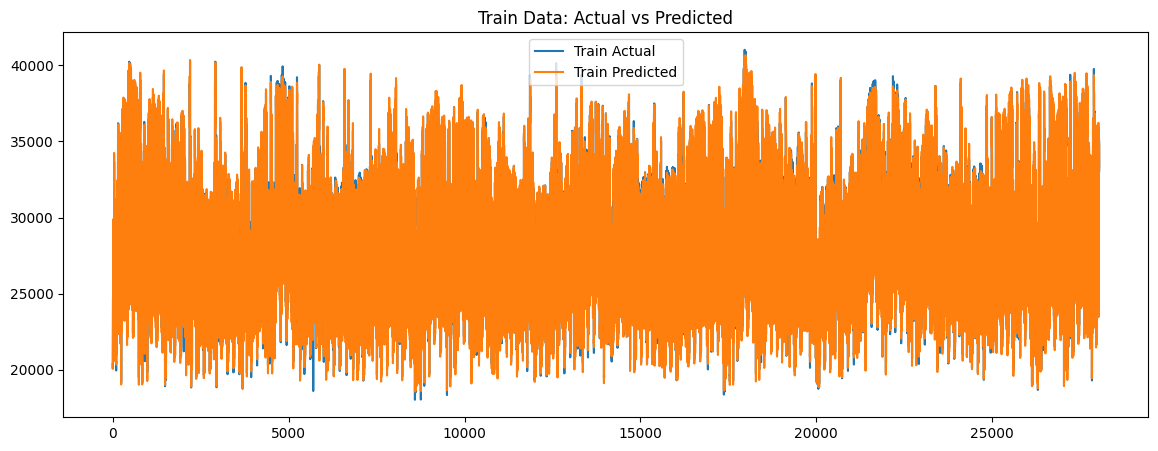

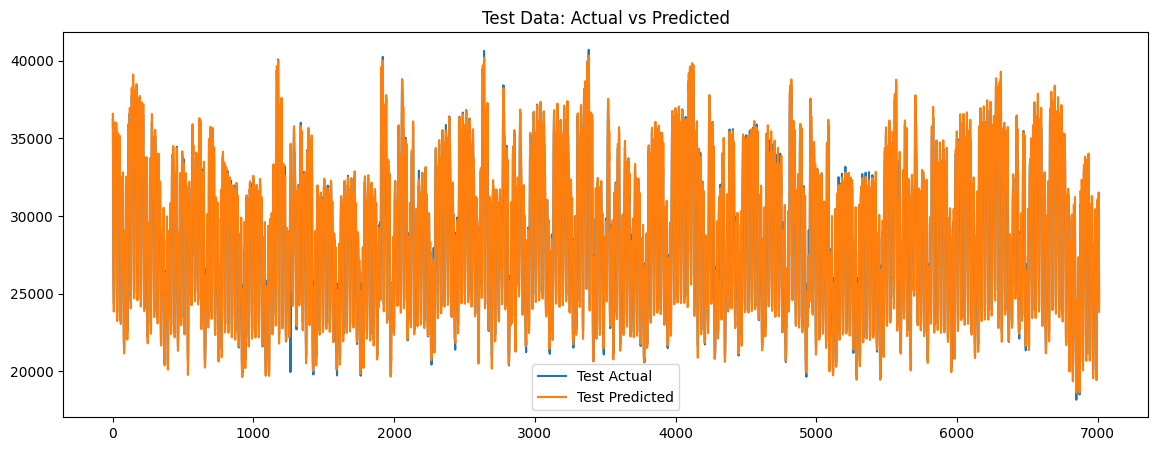

In [78]:
# Make predictions
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Inverse transform predictions and actual values
train_predictions = scaler.inverse_transform(train_predictions)
y_train = scaler.inverse_transform(y_train)
test_predictions = scaler.inverse_transform(test_predictions)
y_test = scaler.inverse_transform(y_test)


# Plot the results
plt.figure(figsize=(14, 5))
plt.plot(y_train, label='Train Actual')
plt.plot(train_predictions, label='Train Predicted')
plt.title('Train Data: Actual vs Predicted')
plt.legend()
plt.show()

plt.figure(figsize=(14, 5))
plt.plot(y_test, label='Test Actual')
plt.plot(test_predictions, label='Test Predicted')
plt.title('Test Data: Actual vs Predicted')
plt.legend()
plt.show()


In [175]:
y_test

array([[36230.],
       [35065.],
       [32328.],
       ...,
       [28071.],
       [25801.],
       [24455.]])

In [79]:
train_predictions = model.predict(X_train)
train_predictions

877/877 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step


array([[0.08966687],
       [0.14075848],
       [0.13067874],
       ...,
       [0.66132605],
       [0.6701928 ],
       [0.7301738 ]], dtype=float32)

In [190]:
train_predictions=scaler.inverse_transform(train_predictions)
train_predictions

array([[0.09578615],
       [0.13131177],
       [0.11272699],
       ...,
       [0.6241089 ],
       [0.6230149 ],
       [0.67574626]], dtype=float32)

In [153]:
X_test

array([[[0.7400975 ],
        [0.65835292],
        [0.65047445],
        ...,
        [0.67881083],
        [0.70466614],
        [0.75676852]],

       [[0.79172108],
        [0.7400975 ],
        [0.65835292],
        ...,
        [0.65617655],
        [0.67881083],
        [0.70466614]],

       [[0.74101158],
        [0.79172108],
        [0.7400975 ],
        ...,
        [0.65047445],
        [0.65617655],
        [0.67881083]],

       ...,

       [[0.50901019],
        [0.5489684 ],
        [0.50278576],
        ...,
        [0.36597893],
        [0.39035431],
        [0.4329677 ]],

       [[0.43658048],
        [0.50901019],
        [0.5489684 ],
        ...,
        [0.37855837],
        [0.36597893],
        [0.39035431]],

       [[0.33777313],
        [0.43658048],
        [0.50901019],
        ...,
        [0.50278576],
        [0.37855837],
        [0.36597893]]])

In [154]:
xx

NameError: name 'xx' is not defined

In [155]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, test_predictions )


rmse = np.sqrt(mse)
print(f'RMSE: {rmse}')


RMSE: 731.699348649977


In [80]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test,test_predictions)

# Print the R² score
print(f"R² Score: {r2}")

R² Score: 0.976598875564788


In [107]:
import pandas as pd
import numpy as np

def generate_random_input():
    """
    Function to generate random input values for the specified features,
    sum them up, and return the DataFrame with the summed values.
    """
    # Generate random values for the input features
    random_values = {
        'generation-fossil-gas_day1': np.random.randint(1500, 1600, 7),
        'generation-fossil-oil_day1': np.random.randint(120, 11100, 7),
        'generation-hydro-pumped-storage-consumption_day1': np.random.randint(100, 1150, 7),
        'generation-hydro-run-of-river-and-poundage_day1': np.random.randint(1810, 11250, 7),
        'generation-hydro-water-reservoir_day1': np.random.randint(1100, 1300, 7),
        'generation-nuclear_day1': np.random.randint(1150, 1300, 7),
        'generation-other_day1': np.random.randint(110, 150, 7),
        'generation-other-renewable_day1': np.random.randint(1120, 11300, 7),
        'generation-solar_day1': np.random.randint(1200, 1400, 7),
        'generation-waste_day1': np.random.randint(10, 50, 7)
    }

    # Create a DataFrame from the random values
    random_input_df = pd.DataFrame(random_values)

    # Calculate total generation for each day
    random_input_df['total_generation'] = random_input_df.sum(axis=1)

    return random_input_df

# Example usage of the function for generating random input
print("Random input DataFrame:")
random_input_df = generate_random_input()

total_generation = random_input_df["total_generation"]
total_generation_df = pd.DataFrame(total_generation)


Random input DataFrame:


In [ ]:
import pandas as pd

def get_user_input():
    """
    Function to get user input values for the specified features,
    sum them up, and return the DataFrame with the summed values.
    """
    features = [
        'generation-fossil-gas_day1',
        'generation-fossil-oil_day1',
        'generation-hydro-pumped-storage-consumption_day1',
        'generation-hydro-run-of-river-and-poundage_day1',
        'generation-hydro-water-reservoir_day1',
        'generation-nuclear_day1',
        'generation-other_day1',
        'generation-other-renewable_day1',
        'generation-solar_day1',
        'generation-waste_day1'
    ]

    # Dictionary to store user inputs
    user_values = {feature: [] for feature in features}

    # Number of days to input data
    num_days = 7

    # Get user input for each day and feature
    for day in range(1, num_days + 1):
        print(f"\nEnter data for Day {day}:")
        for feature in features:
            while True:
                try:
                    value = float(input(f"Enter value for {feature} (Day {day}): "))
                    user_values[feature].append(value)
                    break
                except ValueError:
                    print("Invalid input. Please enter a numerical value.")

    # Create a DataFrame from the user values
    user_input_df = pd.DataFrame(user_values)

    # Calculate total generation for each day
    user_input_df['total_generation'] = user_input_df.sum(axis=1)

    return user_input_df

# Example usage of the function for getting user input
print("Please enter your data manually:")
user_input_df = get_user_input()

# Print the DataFrame with the user input data
print("\nUser input DataFrame:")
print(user_input_df)

# Extracting the total generation and converting it to DataFrame
total_generation = user_input_df["total_generation"]
total_generation_df = pd.DataFrame(total_generation)
print("\nTotal Generation DataFrame:")
print(total_generation_df)


Please enter your data manually:

Enter data for Day 1:
Enter value for generation-fossil-gas_day1 (Day 1): 233
Enter value for generation-fossil-oil_day1 (Day 1): 2132
Enter value for generation-hydro-pumped-storage-consumption_day1 (Day 1): 2323
Enter value for generation-hydro-run-of-river-and-poundage_day1 (Day 1): 2323
Enter value for generation-hydro-water-reservoir_day1 (Day 1): 2123
Enter value for generation-nuclear_day1 (Day 1): 2332
Enter value for generation-other_day1 (Day 1): 323
Enter value for generation-other-renewable_day1 (Day 1): 3
Enter value for generation-solar_day1 (Day 1): 123
Enter value for generation-waste_day1 (Day 1): 23

Enter data for Day 2:
Enter value for generation-fossil-gas_day1 (Day 2): 12132
Enter value for generation-fossil-oil_day1 (Day 2): 23213
Enter value for generation-hydro-pumped-storage-consumption_day1 (Day 2): 1233
Enter value for generation-hydro-run-of-river-and-poundage_day1 (Day 2): 2323
Enter value for generation-hydro-water-reserv

In [108]:
# Transpose the DataFrame user_input_df
total_generation_df= total_generation_df.T

print("Inverted user input DataFrame:")
print(total_generation_df)
total_generation_df.values


Inverted user input DataFrame:
                      0      1      2      3      4      5      6
total_generation  24304  18959  23403  20478  25306  28477  27498


array([[24304, 18959, 23403, 20478, 25306, 28477, 27498]], dtype=int64)

In [83]:
# scaler = MinMaxScaler(feature_range=(0, 1))
# scaled_features = scaler.fit_transform(inverted_user_input_df)

In [84]:
# scaler = MinMaxScaler(feature_range=(0, 1))
# scaled_features = scaler.fit_transform(features)
# scaled_target = scaler.fit_transform(target.values.reshape(-1, 1))

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(scaled_features, scaled_target, test_size=0.2, shuffle=False)

# # Reshape input to be 3D (samples, timesteps, features) as required by LSTM
# X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
# X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [109]:
total_generation_array = total_generation_df.values.reshape(-1, 1)

# Fit and transform the data
total_generation_array= scaler.fit_transform(total_generation_array)



In [250]:
# total_generation_array= scaler.fit_transform(total_generation_array)

In [110]:
total_generation_array

array([[0.56156756],
       [0.        ],
       [0.46690481],
       [0.15959235],
       [0.66684177],
       [1.        ],
       [0.89714226]])

In [111]:
total_generation_array=total_generation_array.reshape((total_generation_array.shape[0],total_generation_array.shape[1],1))

In [112]:
total_generation_array.shape

(7, 1, 1)

In [113]:
total_generation_array

array([[[0.56156756]],

       [[0.        ]],

       [[0.46690481]],

       [[0.15959235]],

       [[0.66684177]],

       [[1.        ]],

       [[0.89714226]]])

In [167]:
total_generation_array

array([[[0.5543234 ]],

       [[1.        ]],

       [[0.86040444]],

       [[0.06110024]],

       [[0.30629847]],

       [[0.72254838]],

       [[0.        ]]])

In [90]:
final=model.predict(total_generation_array)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 607ms/step


In [91]:
final

array([[0.5708873 ],
       [0.58525455],
       [0.5467395 ],
       [0.5397456 ],
       [0.4575046 ],
       [0.58591497],
       [0.55767816]], dtype=float32)

In [92]:
final = scaler.inverse_transform(final)

In [118]:
import joblib
from sklearn.preprocessing import StandardScaler

# Assuming 'scaler' is your trained scaler
joblib.dump(scaler, 'scaler.pkl')


['scaler.pkl']

In [93]:
final

array([[22399.89 ],
       [22603.762],
       [22057.232],
       [21957.99 ],
       [20790.99 ],
       [22613.133],
       [22212.453]], dtype=float32)

In [172]:
xx=X_test[0:1]
xx
test_predictions = model.predict(xx)
xx
test_predictions = scaler.inverse_transform(test_predictions)
test_predictions

1/1 [==============================] - 0s 28ms/step


array([[0.7751031]], dtype=float32)

In [94]:
final[0]

array([22399.89], dtype=float32)

In [95]:
# # from sklearn.preprocessing import MinMaxScaler

# # # Initialize the MinMaxScaler
# # scaler = MinMaxScaler()

# # # Fit and transform the data
# # normalized_values = scaler.fit_transform(total_generation_df)

# # # Create a DataFrame from the normalized values
# # normalized_df = pd.DataFrame(normalized_values, columns=total_generation_df.columns, index=total_generation_df.index)

# # print("Normalized DataFrame:")
# # print(normalized_df)


# # this is used if you have the dataset with you



# from sklearn.preprocessing import MinMaxScaler

# # Initialize the MinMaxScaler
# scaler = MinMaxScaler()

# # Reshape the array to fit the scaler's requirements
# total_generation_array = total_generation.values.reshape(-1, 1)

# # Fit and transform the data
# scaled_total_generation = scaler.fit_transform(total_generation_array)

# # Print the normalized array
# print(scaled_total_generation)

# print(scaled_total_generation)


In [96]:
# # Assuming 'model' is your trained LSTM model and 'scaled_total_generation' is your input data

# # 1. Make predictions with the LSTM model
# test_predictions_scaled = model.predict(scaled_total_generation)

# # 2. Inverse transform the predictions


# # Ensure 'y_test' is correctly formatted and adjust its length if necessary
# # Then, inverse transform 'y_test' if it was scaled
# # y_test = scaler.inverse_transform(y_test)


In [104]:
# print(merged_data.index)

In [97]:
# # Assuming you have your LSTM model named 'model'
# # Assuming your new data is named 'new_data'
# import pandas as pd

# # Use the predict method of the LSTM model
# predictions = model.predict(scaled_total_generation)

# # Convert the prediction array to a DataFrame or Series with the appropriate index
# prediction_index = scaled_total_generation.index  # Use the index of your new data
# predictions = pd.Series(predictions, index=prediction_index)

# # Print or use the predictions as needed
# print(predictions)



In [98]:
# # Reshape the array to fit the LSTM model's requirements
# scaled_total_generation_reshaped = scaled_total_generation.values.reshape((1, scaled_total_generation.shape[0], 1))

# # Use the predict method of the LSTM model
# predictions = model.predict(scaled_total_generation_reshaped)

# # Convert the prediction array to a DataFrame or Series with the appropriate index
# prediction_index = scaled_total_generation.index  # Use the index of your new data
# predictions = pd.Series(predictions.flatten(), index=prediction_index)

# # Print or use the predictions as needed
# print(predictions)


In [103]:
# scaled_total_generation

In [99]:
# import pandas as pd

# # Assuming your new data is stored in a DataFrame named 'new_data'
# # Create a new index for the DataFrame
# index = range(len(scaled_total_generation))

# # Assign the index to the DataFrame
# scaled_total_generation.index = index

# # Now your DataFrame has an index starting from 0 to len(new_data) - 1


In [100]:
# scaled_total_generation

In [106]:
model.save('my_model.keras')

In [102]:
# print(scaled_total_generation)

# scaled_total_generation

In [ ]:
from tensorflow.keras.models import load_model

# Load the model
loaded_model = load_model('my_model.keras')

# Assuming X_new is your new data
# Replace this with your actual new data


# Make predictions
predictions = loaded_model.predict()
predictions.scal
# Display or use the predictions as needed
print(predictions)


In [114]:
from tensorflow.keras.models import load_model

# Load the model
loaded_model = load_model('my_model.keras')

# Assuming X_new is your new data
# Replace this with your actual new data


# Make predictions
predictions = loaded_model.predict(total_generation_array)

# Display or use the predictions as needed
print(predictions)


e:\mlfinalinfosys\env\Lib\site-packages\keras\src\saving\saving_lib.py:415: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 12 variables whereas the saved optimizer has 22 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 565ms/step
[[0.5372938 ]
 [0.4575046 ]
 [0.5125082 ]
 [0.44688246]
 [0.55815035]
 [0.58591497]
 [0.58047795]]


In [116]:
final = scaler.inverse_transform(predictions)

In [117]:
final


array([[24072.963],
       [23313.53 ],
       [23837.055],
       [23212.426],
       [24271.477],
       [24535.738],
       [24483.988]], dtype=float32)